# Data Analysis with CSVs

In this lesson, we'll complete a full data analysis with a raw data file. **Comma Separated Values** files, known as CSVs, are one of the most common file formats for storing tabular data. In this lesson, we'll show you how to load one into memory and work with it using Python.

# Objectives

Perform a complete data analysis by...

- Creating a Python data structure from a .csv file
- Exploring and cleaning the data 
- Conducting descriptive analysis
- Visualizing the results

# Loading a CSV

The before you can work with a CSV file, you need to load it into memory.

We'll be working with food data! Data source: https://www.kaggle.com/datasets/openfoodfacts/world-food-facts (version we're using has been lightly cleaned and edited for clarity, and because we don't need all 163 columns)

## First up - to the Terminal!

## Get the File Path

Make sure you have the path to your data file. For this example, it is in the root folder of this repository.

Open a new Terminal window (one that doesn't have Jupyter running) and check out the _relative_ location and path between this notebook and the `chipotle.csv` data file.

Now, let's save that relative path here, as a string variable.

We use `.` to indicate the root folder of the repository when working within this notebook.

In [73]:
csv_file_path = "./data/OpenFoodFacts.csv"

In [74]:
#./ tells jupy that we are in the current notebook that in our terminal,
#then we navigate from there 

## Inspecting CSV files

In a CSV file, each line represents one row of tabular data, and consecutive values in that row are separated by a comma. Often, the first row contains the column names separated by commas, also known as field names. Let's confirm that this is the case and learn about our dataset by printing the first five lines of the file.

We can inspect the data directly in our terminal! Use the bash command `head` with the flag `-n 5` to check out those first two rows.

### Printing Lines in Python

We use the `with open()` syntax to easily open and read the file in the notebook. Using this syntax will automatically close the file once the statement is done running.

In [75]:
# This code prints the first line of the CSV file

with open(csv_file_path) as csvfile:
    print(csvfile.readline())

product_name,brands,created_date,last_modified_date,serving_size,energy_100g,fat_100g,carbohydrates_100g,sugars_100g,proteins_100g



Next, we can print the second line to look at an example of one observation from our dataset. 

In [76]:
# This code prints the second line of the CSV file

with open(csv_file_path) as csvfile:
    csvfile.readline()
    print(csvfile.readline())

Banana Chips Sweetened (Whole),,2017-03-09,2017-03-09,28.0 g,2243.0,28.57,64.29,14.29,3.57



In [77]:
# everytiume you run "readline" it moves on to the next line, if its 
# witin the same block 

### Discussion

Based on these two lines, what can we infer about the contents of the data file? What questions arise for you about the data?

- 


## Using the `csv` module

The [`csv` module](https://docs.python.org/3/library/csv.html) lets us easily process data in CSV files. We will use it to read each row in the `.csv` file and store its information in a Python object we can use for further analysis. 

In [78]:
# Import the csv module here #this is a library in python 
import csv
#this is not a file, this is a python module (like numpy)

In [79]:
#csv.(tab) tells you what you can do with that - what functions and 
# classes are within this csv module/ 

The [`csv.DictReader`](https://docs.python.org/3/library/csv.html#csv.DictReader) object is a file reader, reading each row and then converting it to a dictionary. By default, it turns each row into a dictionary, using the field names from the first row as the keys.

In [80]:
# Print OrderedDict from first row of CSV file 

with open(csv_file_path) as csvfile:
    reader = csv.DictReader(csvfile)
    print(next(reader))

{'product_name': 'Banana Chips Sweetened (Whole)', 'brands': '', 'created_date': '2017-03-09', 'last_modified_date': '2017-03-09', 'serving_size': '28.0 g', 'energy_100g': '2243.0', 'fat_100g': '28.57', 'carbohydrates_100g': '64.29', 'sugars_100g': '14.29', 'proteins_100g': '3.57'}


Let's get all of the data out of our file and into dictionaries, and store those dictionaries in a new list called `products`.

In [81]:
products = []

with open(csv_file_path) as csvfile:
    reader = csv.DictReader(csvfile)
    for row in reader:
        products.append(row)
        print(row['product_name'])

Banana Chips Sweetened (Whole)
Peanuts
Organic Salted Nut Mix
Organic Polenta
Breadshop Honey Gone Nuts Granola
Organic Long Grain White Rice
Organic Muesli
Organic Dark Chocolate Minis
Organic Sunflower Oil
Organic Adzuki Beans
Organic Penne Pasta
Zen Party Mix
Organic Golden Flax Seeds
Organic Spicy Punks
Cinnamon Nut Granola
Organic Hazelnuts
Organic Sweetened Banana Chips
Lotus Organic Brown Jasmine Rice
Organic Oat Groats
Energy Power Mix
Antioxidant Mix - Berries & Chocolate
Organic Quinoa Coconut Granola With Mango
Fire Roasted Hatch Green Chile Almonds
Peanut Butter Power Chews
Real Salt Granular
Organic Unswt Berry Coconut Granola
Roasted Salted Black Pepper Cashews
Thai Curry Roasted Cashews
Wasabi Tamari Almonds
Organic Medium Shredded Coconut
Organic Red Quinoa
Dark Chocolate Coconut Chews
Seventh Heaven Organic Trail Mix
Organic Unsweetened Granola, Cinnamon Almond
Organic Blueberry Almond Granola
Sweeteners, Demerara Turbinado Sugar
Aunt Maple's Crunchy Granola
Organic Co

Macaroni Salad
Mustard Potato Salad
Macaroni Salad
Northwest Potato Salad
Northwest Potato Salad
Ham Salad
Red Potato Salad
Cole Slaw
Macaroni & Cheese
Potato Salad
Deviled Egg Potato Salad
Gravy
Red Powdered Donut Holes
Green Powdered Donuts Holes
Powdered Donut Holes
Pineapple Upside Down Cake
The Fresh Goodness, Peppermint Dipped Treats Party Tray
White Chocolate Cookies, Cranberry
Peppermint Shortbread Cookies
Horean Kalbi Beef
Potato Salad
Potato Salad
Cranberry Orange Mini Loaf Cakes
Aged Cheddar And Broccoli Soup
Chicken Tortilla Soup
New England Style Clam Chowder
Loaded Baked Potato Style Soup
Cream Tomato Bisque
Classic Chicken Noodle Soup With White Chicken Meat
Smokin Stampede Chili
Chicken & Sausage Gumbo
Lobster Bisque With Sherry
Cheesy Chicken Enchilada Soup With White Chicken Meat
Bisque, Roasted Red Pepper Gouda
Aged Cheddar And Broccoli Soup
Loaded Baked Potato Style Soup
Chicken Tortilla Soup
Creamy Tomato Bisque
Classic Chicken Noodle Soup
Tortellini
Spinach & Chee

Enriched Macaroni Product, Shells
Enriched Macaroni Product, Rotini
Enriched Macaroni, Tomato Macaroni, & Spinach Macaroni Product, Rainbow Twirls
Alfredo Sauce, Four Cheese
Alfredo Sauce, Roasted Garlic
Lite Raspberry Vinaigrette
Lite Four Leaf Balsamic, Vinaigrette & Marinade
Classic Mayo Real Mayonnaise
Classic Mayo Real Mayonnaise
Crispy Rice Cereal
Enriched, Wide Egg Noodles
Vodka Pasta Sauce
Shells & Cheese
Macaroni & Cheese
Deluxe Shells 7 Cheddar, Macaroni & Cheese Dinner
Macarini & Cheese Dinner
Original Macaroni & Cheese Dinner
Deluxe Original Macaroni & Cheese Dinner
Graham Cracker
Butter Spread
Quick Bread & Muffin Mix, Banana
Hoisin sauce
Living Well, Multi-Grain Cereal
Living Well, Multi-Grain Cereal, Cinnamon
Classic Ripples Potato Chips
Chopped Kale
Ripples Potato Chips, Cheddar, Sour Cream
Haricots Verts Green Beans
Potatoes With Cheese Sauce Mix.
Flour Tortillas
All Purpose Baking Mix
Italian Flat Egg Noodles
Long Pasta Spirals
Large Pasta Rings, Italian Macaroni Prod

Flatbread Sandwiches, Ham, Egg & Pepper Jack Cheese
Flatbread Sandwiches, Egg & Cheese
Light Wheat Muffin Sandwiches, Turkey Sausage, Egg While & Cheese
Light Croissant Sandwiches, Turkey Sausage, Egg White & Cheese
Select, Creamy Ricotta, Romano, Parmesan And Asiago Cheese, Ravioli
Select, Four Cheese Jumbo Ravioli
Select, Beef Ravioli
Select, Ravioli, Portobello Mushroom
Select, Cheese Tortellacci
Select, Spinach Ravioli
Beer Battered Fish Fillets
Fisherman's, Alaska Pollock Crunchy Fish Sticks
Fisherman's Reserve, Crunchy Fish Fillets
Fisherman's Reserve Beer Battered Cod Fillets
Fisherman's Reserve Cheddar Bacon Encrusted Flounder
Fisherman's Reserve, Breaded Parmesan Encrusted Tilapia
Breaded Parmesan Encrusted Tilapia
Breaded Tortilla & Lime Encrusted Tilapia
Encrusted Tilapia
Breaded Cheddar Bacon Encrusted Shrimp
Fisherman's, Tilapia Fillets
Whole Tilapia Fillet
Fisherman's, Wild Pacific Salmon Fillets
Wild Pacific Salmon Fillets
Fisherman's, Cod Fillets
Fisherman's Reserve, Wi

Cauliflower
Mixed Vegetables
Green Peas
Chopped Spinach
Chopped Collard Greens
Chopped Kale
Field Peas With Snaps
Winter Blend
Beef Hamburgers
Buttermilk Round Waffles
Pancakes
Buttermilk Pancakes
Mango Sherbet
Chicken Breast Nuggets
Chicken Breast Patties
Baked Potato Cakes
Tamari Sesame Brown Rice Snaps
Edward & Sons, Brown Rice Snaps, Tamari Seaweed
Edward & Sons, Whole Grain Brown Rice Snaps, Unsalted Sesame
Baked Brown Rice Snaps, Onion Garlic
Edward & Sons Miso Cup Miso Soup Mix Instant
Edward & Sons, Miso-Cup, Savory Soup With Seaweed
Edward & Sons, Miso-Cup, Delicious Golden Vegetable Soup
Misco-Cup, Savory Soup With Seaweed
Smarties, Candy Rolls, Assorted
Smarties, Candy Rolls, Assorted
Candy Rolls
Smarties, Candy Rolls Value Bag
Assorted Flavors Candy Rolls
Smarties, Candy Rolls
Candy Rolls
Candy Rolls
Smarties, Valentine Candy Rolls, Assorted
Valentine Candy Rolls
Smarties, Mega Double Lollies, Lollipops
Smarties, Easter Assorted Candy Rolls
Easter Candy Rolls
Smarties, Mega

Hard Candy, Cinnamon
Sugar Free Lemon Drops Hard Candy, Lemon
California Raisins
Brachs, Milk Chocolate Stars
Chocolate Creations, Milk Chocolate Double Dippers
Star Brites Candy, Peppermint
Jelly Beans Candy
America's #1 Candy Corn
Autumn Mix Candy
Candy Corn
Mellowcreme Pumpkins Candy
Indian Corn Candy
Classic Candy Corn
Maple Nut Goodies
Spice Drops
Milk Maid, Royals Made With Real Caramel
Gummy Worms Candy
Star Brites Peppermint Candy
St. Michael's, Premium Chicharon, Fried Pork Rinds
Greek Yogurt Fruit On The Bottom, Peach Cream
Raspberry Cream
Marinara Sauce
D'Arbo, Fruit Spread, Rose Apricot
D'Arbo, All Natural Fruit Spread, Garden Strawberry
Wild Lingonberry Sauce
D'Arbo, Fruit Spread, Marasque Sour Cherry
Organic Lowfat Yogurt, Peach
Organic Lowfat Yogurt, Raspberry Rush
Organic Lowfat Yogurt, Strawberry Crush
Organic Lowfat Yogurt, Vanilla Velvet
Lactose Free-Made With Milk
Lactose Free-Made With Milk
Lowfat Yogurt
Lowfat Yogurt
Blueberry Cream
Honey
Nonfat Plain Greek Yogurt

Pizza Poppers Cheese, Three Cheese
Pizza Poppers
Pizza Poppers, Uncured Pepperoni
Cookie Bites, Lemon Drop
Mini Pizza Bagels, Three Cheese
Mini Pizza Bagels, Three Cheese
Pizza Poppers
Pizza Poppers
Fruit Snacks
Pea B & J Pockets Soft Crustless Sandwiches, Grape
Pea B&J Pockets Soft Crustless Sandwiches, Strawberry
Pea B & J Pockets Soft Crustless Sandwiches, Grape
Pea B&J Pockets Soft Crustless Sandwiches
Organic Chewy Granola Bars, Chocolate Chip
Organic Chewy Granola Bars, Oatmeal Raisin
Organic Chewy Granola Bars, Peanut Butter Chocolate Chip
Organic Saltine Classics Crackers
Organic Baked Crackers, Buttery Rich Classics
Rising Crust Bbq Recipe Chicken Pizza
Organic Ancient Grains Elbows & White Cheddar, Macaroni & Cheese
Spirals Macaroni & Cheese, Butter & Parmesan
Bunny Pasta With Yummy Macaroni & Cheese
Organic Peace Pasta & Parmesan
Shells & Real Aged Cheddar Macaroni & Cheese
Organic Shells & Real Aged Cheddar, Macaroni & Cheese
Creamy Deluxe Macaroni Dinner, Shells & Real Age

Treet, Luncheon Loaf With Chicken & Pork, Original
Chili With Beans
Original Chili With Beans
Chili No Beans
Sausage With Natural Juices
Dried Beef
Sliced Dried Beef
Corned Beef Hash
Chili With Beans
Corned Beef Hash
Kaukauna, Lite Spreadable Cheese, Port Wine
Kaukauna, Swiss Almond Spreadable Cheese
Spreadable Cheddar Sharp Cheddar
Kaukauna, Spreadable Cheddar Cheese, Port Wine
Kaukauna, Extra Sharp Spreadable Cheddar
Kaukauna, Spreadable Cheddar
Kaukauna, Spreadable Cheddar Cheese, Bacon Jalapeno
Spreadable Cheese
Kaukauna, Spreadable Sharp Cheddar Cheese
Kaukauna, Port Wine Spreadable Cheddar Cheese
Kaukauna, Smoky Bacon Spreadable Cheese With Almonds
Kaukauna, Sharp Cheddar Spreadable Cheese With Almonds
Kaukauna, Spreadable Cheese With Almonds
Kaukauna, Spreadable Cheese With Bell Pepper Coating, Bacon Jalapeno
Kaukauna, Peppadew, Spreadable Cheese With Red Bell Peppers
Kaukauna, Asiago Spreadable Cheese With Almonds
Genuine Wisconsin Spreadable Cheese With Almonds, Sharp Cheddar 

Just Like Mom's Elbow Macaroni Salad
Potato Salad
Just Like Mom's Cole Slaw
Potato & Egg Salad
Potato Salad
Elbow Macaroni Salad
Just Like Mom's Potato Salad
Turkey Bacon, Wood Smoked
Parmigiano Reggiano
Peas & Sliced Carrots
Peas & Sliced Carrots
Diced Pears In Light Syrup
Decaffeinated Black Tea Bags
Decaffeinated Green Tea
Original Sweet Iced Tea Drink Mix
Drink Mix
Hot Cocoa Drink Mix
Hot Cocoa Drink Mix
Drink Mix
Non Stick Cooking Spray
Canola Oil No-Stick Cooking Spray
Pizza Sauce
Gold'N White Whole Kernel Corn
Golden Sweet Whole Kernel Corn
Whole Kernel Corn
Macaroni N' Cheese Dinner
Deluxe Microwaveable Macaroni Shells & Cheddar Dinner
Deluxe Macaroni & Cheese Dinner
Deluxe Shells & Cheddar
Skillet Classics, Cheeseburger Macaroni Hamburger Dinner Mix
Skillet Classics Hamburger Dinner Mix
Hamburger Dinner Mix
Creamy Peanut Butter
Peanut Butter
Creamy Peanut Butter
Bread & Butter Chips
Golden Sweet Cream Style Corn
Chicken Classic Gravy
Classic Gravy
Classic Gravy, Pork
Classics 

Nonfat Greek Yogurt
Nonfat Greek Yogurt
Cottage Cheese
Cottage Cheese
Fat Free Cottage Cheese
Dairy Farms, Lowfat Cottage Cheese
Low Fat Yogurt, Strawberry
Lowfat Yogurt
Lowfat Yogurt
Light Nonfat Yogurt
Whipped Topping
Whipped Topping
Lowfat Yogurt
Family Size Side Dish, Creamy Mashed Potatoes
Curried Quinoa Salad
Citrus Kale Salad With Chicken
Baby Spinach Salad With Chicken
Sweet Cream Butter
Unsalted Sweet Cream Butter
Whipped Butter
Unsalted Sweet Cream Butter
Sweet Cream Butter
Dairy Farms, Unsalted Sweet Cream Butter
Dairy Farms, Sweet Cream Butter, Salted
Dairy Farms, Unsalted Sweet Cream Butter
Fat Free Sour Cream
Spread Sticks, Vegetable Oil Spread
Golden Beet Salad
Molten Chocolate Lava Cake
Belgian Style Mini Cream Puffs
Molten Chocolate Chip Cookie
Upside Down Cake, Pineapple
Hot Sriracha Chili Sauce
Premium Ice Cream
Premium Ice Cream
Ice Cream
Lite Whipped Topping
Fat Free Whipped Topping
Ice Cream Bars
Fudge Bars, Chocolaty Frozen Dairy Dessert
Ice Cream Sandwiches
Ice 

Gummi Bears
Peach Rings Candy
Assorted Fruit Slices
Spice Drops Candy
Candy, Peppermint Stralights
Candy
Orange Slices Candy
Jelly Bean Candy
Gummi Worms Candy
Fruit Slices Candy
Gummi Worms, Sour
Peach Ring Candy
Cinnamon Disks Candy
Red Fish Candy
Heads Candy, Sour
Butterscotch Disks Candy
Lemon Drops Candy
Cherry Sours Candy
Bears Candy
Candy, Watermelon Slices
Blue Sharks Candy
Candy Corn Candy
All Purpose Seasoning
Garlic & Herb Seasoning
Chili Powder
Kitchens, Seasoned Salt
Mayonnaise Dressing With Extra Virgin Olive Oil
Canola Cholesterol Free Mayonnaise
Garlic Salt With Parsley
Pizza Snacks, Pepperoni Pizza In A Golden Crust
Dessert Shells
Lady Fingers
Farms, Carrot Chips
Farms, Minced Garlic
Egg Frittata, Bacon, Tomato And Swiss Frittata
Egg Frittata
Frittata, Maple Sausage, Potato And Cheddar
Ham, Potato, And Cheddar Frittata
Ham, Potato, And Cheddar Frittata
Egg Frittata
Macadamia Nuts Dry Roasted With Sea Salt
Farms, Carrots
Select, Almonds Covered In Dark Chocolate
Marcona

Organic Diced Tomatoes
Crushed Tomatoes With Sweet Basil
Organic Sprouted Brown Rice - Mochi
Organic Sweet Brown Rice Mochi
Organic Brown Rice & Black Soybean
Organic Whole Grain Quinoa
Organic Muesli, Cinnamon
Organic Muesli
Black Beans
Organic Garbanzo Beans
Kidney Beans
Organic Navy Beans
Organic Pasta, Kamut Spirals
Hacho Miso Aged & Fermented Soybeans
Shiro Miso Aged & Fermented Rice & Soybeans
Wakame Flakes Instant Sea Vegetable
Kombu Sea Vegetable
Nori Sea Vegetable
Sushi Nori Toasted Sea Vegetable
Sushi Nori Toasted Japanese Sea Vegetable Sheets
Agar Agar Sea Vegetable Flakes
Soba Wheat & Buckwheat Pasta
Soba Pasta
Selected 100% Whole Buckwheat Pasta
Bifun Wheat Free Rice Pasta
Udon Wheat Pasta
Brown Rice Udon, Wheat Pasta With Brown Rice
Kamut Udon Pasta
Organic Spelt Soba Pasta
Organic Kuzu Root Starch
Pickled Plum Puree
Sun Dried & Sliced Daikon Radish
Pickled Ginger W/ Shiso Leaves
Traditional Barley Malt Syrup
Sea Vegetable Chips
Applewood Smoked Fire Toasted Beef
Nueske's

Uncured Turkey Salami
Natural Uncured Turkey Hot Dog
The Great Organic Uncured Turkey Hot Dog
Uncured Beef Hot Dog
The Great Organic Uncured Beef Hot Dog
Big Apple Hot Dog
Natural Uncured Chicken Hot Dog
The Great Organic Uncured Chicken Hot Dog
Organic Turkey Burgers
Roast Beef
Smoked Turkey Breast
Naturals, Herb Turkey Breast
Roasted Turkey Breast
Organic Smoked Chicken Breast
Organic Roast Beef
Organic Smoked Turkey Breast
Turkey breast
Organic Monterey Jack Cheese
Applegate cheddar cheese
Classic Pork Breakfast Sausage
Savory Turkey Breakfast Sausage
Provolone Cheese
Naturals Cheddar Cheese Medium
Emmentaler Swiss Cheese
Naturals Muenster Cheese
Havarti Cheese
Monterey Jack Cheese

American Cheese
Yogurt Cheese
Naturals, Uncured Genoa Salami
Uncured Soppressata
Prosciutto
Red Hots Meats
Smoked Hot, Chicken, Beef, And Pork Product
Delicious Meats
Old Wessex Ltd., Irish-Style Oatmeal High Fiber Cereal
Old Wessex Ltd., Irish-Style Oatmeal, 100% Whole Grain, High Fiber Cereal
Old Wesse

Cheese Ravioli
Homemade Pasta, Spinach Ravioli
Grilled Portobello Ravioli, Gourmet Pasta
Homemade Pasta, Grilled Vegetable Ravioli
Homemade Pasta, Porcini Ravioli
Roasted Garlic & Rosemary Ravioli
Grilled Asparagus Ravioli
Fire Roasted Tomato & Basil Ravioli
Homemade Pasta, Mixed Greens And Goat Cheese Ravioli
Vegan White Bean And Basil Ravioli
Homemade Pasta, Artichoke & Reggianno Ravioli
Ravioli, Kalamata Olive & Feta
Fusilli Tricolor Pasta Rustica
Ziti Pasta Rustica
Homemade Pasta, Wagon Wheels Pasta
Sprouted Lily Pasta
Gemelli Hand Packed Pasta Rustica
Gemelli - Whole Wheat Pasta Rustica
Amore Heart-Shaped Pasta
Artisanal Fusilli Giganti Pasta
Artisanal Paccheri Pasta
Mafaldine Pasta
Artisanal Perciatelli Pasta
Vermicelli Artisanal Long Pasta
Fettuccine Artisanal Long Pasta
Herb Farmers Cheese Gnocchi
Ravioli, Butternut Squash
Capellini Pasta
Linguine Pasta
Fettuccine Pasta
Tuscan Kale Fettuccine
Ravioli, Roasted Garlic Rosmary
Tricolor Linguine
Classic Gnocchi
4 Cheese Tortelloni


Mini Piegogies
Pierogies
Croissant Sandwiches
Bacon Egg & Cheese Croissant
Light Turkey Sausage, Egg White & Cheese Sandwiches
Light Turkey Sausage Muffin
Streusel Coffee Cake
Egg & Cheese Flatbread Sandwiches
Moose Tracks Ice Cream Sandwiches
Tortilla Chips
Tortilla Chips
Tortilla Chips
Mozzarella String Cheese
Thin Swiss Cheese, A Natural Firm Cheese With A Mellow Flavor
Provolone Cheese
Pizzeria Style Medium Crust Pizza
Pizzeria Style Medium Crust Pizza
Pizzeria Style Medium Crust Pizza
Pizzeria Style Supreme
Traditional Flatbread Pizza
Traditional Flatbread Pizza
Traditional Flatbread Pizza
Creamery Classics Premium Ice Cream
Creamery Classics Premium Ice Cream
French Vanilla Premium Ice Cream
Pomegranate Arils
Sliced Honeycrisp Apples
Cheddar Horseradish Dip
Roasted Red Pepper & Feta Dip
Spinach Artichoke Dip
Organic Sweetened Apple Sauce
Permium Ice Cream
Premium Ice Cream
Stuffed Pretzel Bites
Stuffed Pretzel Bites
Monterey Jack Cheese With Jalapeno & Habanero Peppers Sliced Che

Potato Chips, Bar-B-Q
Potato Chips
Wavy Style Potato Chips
Potato Chips, Bar-B-Q
Potato Chips, Green Onion
Potato Chips, Hot Bar-B-Q
Potato Chips No Salt Added
Conn's, Potato Chips, Sour Cream & Onion Flavored
Potato Chips
Potato Chips
Assorted Tangy Taffy
Bloom's, Sour Filled Fruits
Choc-O-Rum Chews
Assorted Quaffy Candy
Heart Lollipops
Rainbow Pops
Bloom's, Mini Frosted Strawberry Cookies
Mini Frosted Lemon Cookies
Tortilla Chips
Mini Round Tortilla Chips
Bloom's, Fries, Bar-B-Q
Chocolate Chips
Stix Pretzels
Hard Pretzels
Potato Chips
Chinese Cookies
Bloom's Kosher Products, Drizzled Marble Cookies
Almond Horns Cookies
Coffee Candy
Rainbow Pops
Chocolate Chip Cookies
Bloom's, Cookies, Sweet Brownie
Cookies
Cookies
Tangy Taffy
Tangy Taffy
Lemon Tangy Taffy
Tangy Taffy
Tangy Taffy
Tangy Taffy
Oneg, Mini Fruit Slices
Cornbread Mix
Toad-Ally Snax, Hanky Panky Snack Mix, Chocolaty Drizzled, Caramel Corn & Peanuts
Chocolate Drizzled Caramel Corn With Peanuts
Hanky Panky Chocolaty Drizzled 

Solgar, Brewer's Yeast Powder
Eff Milk Chocolate
Dark Chocolate & Coconut Bars
Dark Chocolate & Coconut
Dark Chocolate Covered Peppermint Patties
Dark Chocolate Covered Peppermint Pattie Hearts
Dark Chocolate Covered Bunny
Dark Chocolate Covered Peppermint Patties
Dark Chocolate Covered Peppermint Patties
Dark Chocolate Covered Peppermint Patties
Milk Chocolate Toffee Bits
Bits 'O Brickle Toffee Bits
Nutrageous Snack Size Bars
Caramel Soft Cremes
Soft Cremes
Soft Cremes Candy
Pieces Candy
Candy In A Crunchy Shell Pieces
Sticks Crispy Wafers
Peanut Butter Candy In Crunchy Shell Pastel Eggs
Filled Polar Bears, Miniatures Peanut Butter Cups
Crispy Wafers
Snack Mix
Dark Chocolate Covered Peppermint Pattie Hearts
Crisps And Caramel Bars
Crispy Wafer Bar Sticks, Milk Chocolate, Peanut Butter
Butter Toffee
Peanut Butter Cups
Pumpkin Milk Chocolate
Miniatures Peanut Butter Cups Milk Chocolate
Peanut Butter Cups Milk Chocolate
Peanut Butter Cups
Peanut Butter Cups
Milk Chocolate
Miniatures Pean

Jalapeno Mexican Hot Sauce
Mexican Hot Sauce, Salsa Chipotle
Salsa Clasica Classic Mexican Hot Sauce
Picante Mexican Hot Sauce
Mexican Hot Sauce
Quinoa, Lemon Cranberry
Caesar Salad, Garlic
Mesclun Goat Cheese Salad
Salad, Mesclun Goat Cheese
Tuna Salad, Cranberry & Fuji Apple
Spinach Feta Orzo
Marinade, Mango, Coconut & Pepper
Mustard Dill Sauce
Mushroom Barley Soup
Sweet Potato & Kale Chowder
Egg & Cheddar Frittata
Quiche
Chicken Salad
Buck's Tuna Salad
Tuna, Cranberry
Creamy Potato Salad
Classic Deli, Pasta Salad
Egg Salad
Corn Salad, Hot & Sweet
Picnic Coleslaw
Caesar Salad
Caesar Salad With Chicken
Mesclun Goat Cheese Salad
Zucchini Basil Frittata
Soup, Sweet Potato, Apple & Shallot
Cranyberry Couscous
Spinach Feta Orzo Salad
Home Baked Pizza
Quiche Lorraine
Creamy Zucchini Basil Soup
Broccoli Quiche With Cheddar Cheese
Topping, Apple Crisp
Chicken Salad Snack Pack
Middle Eastern Hummus Snack Break
Chopped Kale Salad
Chopped Kale Salad
Cobb Salad With Turkey & Bacon
Lemon & Garlic

Turkey Meatballs
Turkey Meatballs
Homestyle Meatballs
Angus Beef Meatballs
Sweet Italian Style Meatballs
Italian Style Meatballs
Italian Style Meatballs, Dinner Size Meatballs
Italian Style Meatballs
Meatball Bistro Skillet Meals, Tomato Basil
Meatball Bistro, Mac & Cheese
Stuffed Meatballs, Marinara Sauce
Stuffed Meatballs Cheese In Caramelized Onion Sauce
Bites Buffalo Style Chicken
Bites Breaded Boneless Glazed Chicken Fritters With Chicken Skin, Cheesy Chicken
Bites, Honey Bbq Chicken
Chicken Meatballs
Italian Style Meatballs
Angus Beef Meatballs
Italian Style Meatballs
Servatii, Butter Stollen, Almond
Servatii, Stollen Raisin Bread
Pretzel
Pretzel Baron, Sesame Pretzel
Servatii, All Butter Patriotic Cookies

Organic Virgin Coconut Oil
Organic Refined Coconut Oil
Granola Chips, Maple Pecan
Vegetable Chips, Sea Salt
Kale Quinoa Multigrain Crisps, Hatch & Cheddar
Kale Quinoa Multigrain Crisps, Sweet Jalapeno
Kale Quinoa Multigrain Crisps, White Cheddar
Organic Crispy Cinnamon Crunch 

Colombiana Pandebono
Mendocino, Hot & Sweet Mustard
Chef Salad With Ham & Turkey
Spinach Cranberry Salad With Chicken & Raspberry Dressing
Sweet Potato Cubes With Brown Sugar Seasoning
Savory Greek Brussel Sprouts
Tastebuds, Fresh Guacamole Dip
Chicken Caesar Salad
Fresh Veggie Wedgie Chop Cobb Salad With Chicken & Bacon
Kale Salad With Lemon Citrus Vinaigrette
Foods, Pico De Gallo
Vegetable Kabob With Grill Seasoning
Holley Sweets, Milk Chocolate Pecans
Holley Sweets, Roasted & Salted Pecan
Holly Sweets Butter
Lemon Cake
Lip Pops, Lollipops, Fruit Flavored Lollipop
Lollypop
Bag Of Boogers Gummies, Watermelon/Green Apple/ Lemon Lime
Gummy Band Candy
Disney Frozen Gummy Bands Candy, Grape, Strawberry, Blue Raspberry
Gummy Bands Candy, Grape, Blue Raspberry, Strawberry
Lollipop Rings
Gummies & Stickers
Disney Princess Gummies & Stickers
Valentine Card & Lollipop Kit!
Gummies & Stickers Candy, Fruit
Rudolph, Lip Pops, Lollipops
Candy Cane
Red-Nosed Gummies
Candy
Candy
Chocolatey Fudge Can

Hard Salami
Wisconsin Cheese, Mild Cheddar Cheese
Colby Jack Cheese
Pepper Jack Cheese
Wisconsin Cheese, Muenster Cheese
Baby Swiss Cheese
Sweetened Red Beans (Mashed)
O'sage Peaches In Light Syrup, Peaches
Precooked Italian Sausage Ravioli
Medium Florentine Ravioli
Pie
Cakes By Sue, 2 Layer Italian Cream
Cakes N' Candy, Cake, Lemon Cream Cheese
Cakes By Sue, German Chocolate Cake
Cakes By Sue, Red Velvet Cake
Four Meat Pan Pizza
Ultra Thin Crust Sweet Italian Sausage Pizza
Ultra Thin Crust Pizza, Ultimate Pepperoni
Ultra Thin Crust Pizza, Ultimate Supreme
Bellatoria, Ultra Thin Crust Pizza, Garlic Chicken Alfredo
Ultra Thin Crust Pizza
Bellatoria, Ultra Thin Crust Pizza, Sausage Italia
Ultra Thin Crust Pizza, Roasted Mushroom 'N' Spinach
Ultra Thin Crust Pizza, Ultimate Combo
Pan Pizza
Italia Meat Trio Pan Pizza
Margherita Deluxe Pan Pizza
Ultra Thin Crust Pizza
Ultra Thin Crust Pizza
Ultra Thin Crust Pizza
Gluten Free Thin Crust Pizza, Cheese
New Star, Cooked Shrimp
Extra Virgin Oliv

Small Curd Low Fat Cottage Cheese With Pineapple
Shredded 2 Cheese Pizza
Fat Free Ricotta Cheese
Shredded Sharp Yellow Cheddar Cheese
Shredded Sharp White Cheddar Cheese
Cream Cheese With Smoked Salmon
Cream Cheese With Strawberries
Cream Cheese With Chives And Onions
Cream Cheese With Garden Vegetables
Shredded Natural Blend 4 Cheese
Shredded Taco Blend Cheese
Sliced Part Skim Low-Moisture Mozzarella Cheese
Mild Sliced Provolone Cheese
Chocolate Chip Cookies, Break 'N Bake Style Cookies
Sugar Cookies
Crescent Rolls
Kitchen, Penne A La Vodka
Hickory Smoked Pork Roll, Mild
Real Chocolate Pudding
Rice Pudding
Tapioca Pudding
Yellow Singles Cheese
Low Moisture String Cheese, Mozzarella
Jumbo Flaky Biscuits, Butter
The Great Eggscape, 99% Real Egg Product
Egg Whites
The Great Eggscape, Real Egg Product
100% Liquid Egg Whites
Kitchen, Classic Italian Style Meatballs With Marinara
Kitchen, Cheese Lasagna
Crumbled Blue Cheese
Traditional Chunk Feta Cheese
Traditional Crumbled Feta Cheese
Trad

Flour Tortillas
Flour Tortillas Supersize Tacos
Taco Size Flour Tortillas
Azteca, Taco Salad Shells
Sherbet
Frozen Whole Strawberries
Frozen Blackberries
Frozen Dark Sweet Cherries
Frozen Sliced Peaches
Frozen Red Raspberries
Frozen Berry Medley
Snack Mix, Cheddar
Pasteurized Cheese Snack, Cheddar
American Pasteurized Cheese Snack
Thin Wheat Crackers, Original
Cheese Baked Snack Crackers
Original Snack Crackers
Thin Wheat Crackers
Chewy Cookie
Premium Chocolate Chip Cookies
Cookies, Pecan Shortbread
Premium Chocolate Chunk Cookies
Fudge Sticks, Fudge Covered Creme Wafers
Sandwich Cream Cookies, Double Fudge
Toaster Pastries, Cookies & Creme
Toaster Pastries
Fancy Shredded Mexican Blend Cheese
Shredded Double Cheddar Cheese, White Cheddra, Colored Cheddar
Cheddar Cheese
Ice Cream Color Cups
Lean Stuffed Sandwiches
Sausage & Biscuits
Cream Style Golden Sweet Corn
Whole Kernel Golden Sweet Corn
Mayonnaise, Original
Gelatin Desser
Tomato Ketchup
Creamy Peanut Butter
Mild Salsa
Brownie Mix


Watch Out Butter! Buttery Spread
Country-Style Spread
Fat Free Cottage Cheese, Pineapple
Blended Vanilla Yogurt
Blended Lowfat Yogurt, Raspberry
Lowfat Yogurt
Medium Eggs
Grade A Large Brow Fresh Eggs
Grade A Large Eggs
Jumbo Eggs
Large Eggs
Homestyle Chicken Noodle Soup
Tomato
Chicken Cooking Stock
Cooking Stock Beef
Honey
White Enriched Bread
Raisin Bread
Deli Rye Bread
Split Top White Enriched Bread
Split Top Wheat Bread
Split Top Wheat Bread
Cottage White Enriched Bread
Cottage Wheat Enriched Bread
Enriched White Bread
Cocoa Crispy Rice Sweetened Rice Cereal Made With Real Cocoa
Fruity Crispy Rice
Crisp Crunch Berry, Sweetened Corn & Oat Cereal
Apple Butter
Sweet N' Tangy Barbecue Sauce
Chocolate Sandwich Cookies, Winter Peppermint
Creamy Peanut Butter
Extra Crunchy Peanut Butter
Creamy Peanut Butter Spread
Creamy Peanut Butter
Extra Crunchy Peanut Butter
Creamy Peanut Butter
Extra Crunchy Peanut Butter
Jelly, Concord Grape
Orange Marmalade
Jelly, Strawberry
Preserves, Peach
Preser

Saltines
Unsalted Tops Saltines
Snack Crackers
Graham Crackers, Honey
Graham Cracker Pie Crust
Pancake Mix, Complete Buttermilk
Corn Muffin Mix
Cornbread Mix
Chocolate Chip Cookies
Artificially Flavored
Shortbread Cookies, Strawberry
Duplex Sandwich Creme Cookies
Assorted Sandwich Creme Cookies
Color Cups
Sugar Cones
Cake Cups
Salt
Iodized Salt & Pepper Set
Light Brown Sugar
Sugar, Dark Brown
Sugar, Dark Brown
Powdered Sugar
Powdered Sugar
Light Brown Sugar
Maraschino Cherries
Maraschino Cherries
Maraschino Cherries With Stems
Microwave Popcorn
Light Microwave Popcorn, Butter
Extra Butter Microwave Popcorn, Theatre Style
Popcorn
Microwave Popcorn
Classic Gravy Mix
Spaghetti Sauce
Classic Seasoning, Zesty Taco
Hearty Chili
Classic Gravy Mix
Garlic Salt
Garlic Salt
Marshmallows
Mini Marshmallows
Butter Toffee Peanuts
Deluxe Mixed Nuts
Sliced California Ripe Olives
Chopped California Ripe Olives
Medium Pitted California Ripe Olives
Large Pitted California Ripe Olives
Jumbo Pitted Californ

Limited Edition Ice Cream
Premium Limited Edition Ice Cream
Ice Cream, Peanut Butter Pie
Premium Neapolitan Lowfat Frozen Yogurt
Premium Lowfat Frozen Yogurt
Organic Ice Cream
Italian Gorgonzola Cheese
Mesquite Smoke Almonds
Shrimp Skerwers
Tuscan Herb Finishing Butter
Organic Dark Chocolate Covered Walnuts
Milk Chocolate Covered Peanut Butter Pretzels
Marcona Almonds Roasted & Salted
Buffalo Style Chicken Breast Dip
Trail Mix, Dark Chocolate, Cranberry
Mayonnaise
Goat Cheese
Deli Chipotle Turkey Breast Salad
Deli, Black Bean Hummus, Olive Oil And Roasted Red Peppers
Deli, Spicy Black Bean Dip
Deli, Shredded Italian Blend Cheese
Pecorino Romano Cheese
Deli, Shredded Parmigiano Reggiano Cheese
Soft Ripened Cheese
Chocolate Raisins With Sea Salt Caramel Flavored Coating
Deli, Goat Cheese, Cranberry Cinnamon
Southern Style Potato Salad
Chicken Salad
Had Salad
Deli Macaroni Salad
Deli Egg Salad
Homestyle Red Potato Salad
Deli New York Style Potato Salad
Tuna Salad
Deli, Greek Kalamata Humm

Orange Slices
Hostees Mix

Gummi Worms
Candy Corn, Caramel Apple
Jelly Pumpkins
Classic Marshmallows
Mini Marshmallows
Marshmallows
Spice Drops
Jelly Wreaths
Holiday Non-Pareils
Speckled Jelly Beans
Tiny Jelly Beans
Jelly Beans
Easter Juju Mix
Easter Jellies
Cherry Slices
Gummi Pumpkins
Candy Corn
Gummy Scary Worms
Juju Mix
Juju Pumpkins Candy
Salted & Roasted Mixed Nuts
Lightly Salted Mixed Nuts
Deluxe Mixed Nuts, Roasted & Salted
Roasted & Salted Whole Cashews
Halves & Pieces Cashews
Whole Almonds
Roasted Whole Almonds, Lightly Salted
Raw Whole Almonds
Classic Trail Mix
Fruit & Nut Trail Mix
Chocolate Indulgent Trail Mix
Energy Trail Mix
Party Peanuts
Party Peanuts
Dry Roasted Peanuts
Lightly Salted Dry Roasted Peanuts
Unsalted Dry Roasted Peanuts
Mixed Nuts
Cashews Made With Sea Salt
Mixed Nuts Lightly Salted
Smoked Almonds
Whole Cashews
Honey Roasted Peanuts
Honey Roasted Peanuts
Roasted Peanuts
Deluxe Mixed Nuts
Dry Roasted Peanuts
Dry Roasted Sunflower Seeds
Fancy Deluxe Cashews


Premium Ice Cream
Fit&Active, Classic Turkey Franks
Deluxe Macaroni & Cheese, Original Cheddar
Tuna Salad
Seafood Salad
Cashews Halves & Pieces
Chicken Parmagiana With Tomato Sauce
Ice Cream Bar
Yolk Free Noodle Style Pasta
Sweet Additions, Natural Calorie - Free Sweetener
Chicken Breasts With Rib Meat
California Golden Raisins
Pasta Sauce
Indulgent Trail Mix
Buffalo Chicken Slider Sandwiches
Refried Beans
Chicken & Cheese Taquitos Rolled In Flour Tortillas
Tortilla Chips
Premium Honey Ham
Lasagna
Pretzels Mini Twists
Butter Microwave Popcorn
Kids 12 Sugar Cones
Corn Rice Cakes
Original Fudge Striped Shortbread Cookies
Frosted Shredded Wheat Cereal, Blueberry
Protein Meal Bars
Pecan Shortbread Cookies
Ice Cream Crunch Bars
Cookies
Fudge Pops
Austrian Beer Mustard
Chewy Bars
Chewy Bars
Sweet & Salty Nut Granola Bars
Graham Crackers
Fruit Strips, Raspberry
Honey Graham Crackers
Cookies
Swiss Rolls
Wafers Bars, Peanut Butter
Salad Dressing & Dip Mix
Stonemill Essentials, Italian Salad Dre

Brew Pub, Lotzza Motzza, 9" Frozen Pizza, Sausage
Brew Pub, Lotzza Motzza, 9" Frozen Pizza, Pepperoni
Brew Pub, Lotzza Motzza, 9" Frozen Pizza, Supreme
Chinese Style Lobster Egg Rolls
Festive, Ground Turkey, Original
Taco Seasoned Ground Turkey
Tender & Juicy Young Turkey
Premium Basted Roasted Young Turkey
Primo Taglio, Turkey Breast, Honey
Primo Taglio, Bold Southwestern Style Turkey Breast
Primo Tagilo, Bold Cajun Style Turkey Beast
Spicy Buffalo Style Chicken Breast
Seasoned Turkey Breast
Artisan Golden-Roasted Turkey Breast
Primo Taglio, Oven Roasted Chicken Breast
Primo Taglio, Mesquite Bbq Seasoned Chicken Breast
Lean Ground Turkey
Ground Turkey
Lean Ground Turkey
Ground Turkey
Lean Ground Turkey
Ground Turkey Lean
Ground Turkey
Lean Ground Turkey
Ground Turkey
Ground Turkey
Turkey Breakfast Sausage, Lean Mild
Lean Turkey Breakfast Sausage, Hot
Turkey Necks
Dinner Roast Turkey Breast
Festive, Turkey Loaf & Gravy, White & Dark Meat
Turkey Loaf & Gravy In Roasting Pan White Meat
L

Breakfast Scramble With Meatless Sausage & Country-Style Potatoes
Chinese Noodles & Veggies In A Cashew Cream Sauce
Pesto Pizza Rice Crust
Bowls, 3 Cheese & Kale Bake
Bowls, Chili Mac
Rice Mac & Cheese
Bowls, Harvest Casserole
Swirls, Artichoke & Parmesan
Swirls Cheddar Jalapeno
Mushroom & Cheese Swirls
Pesto Swirls
Sonoma Veggie Burger
California Veggie Burger Patties
Broccoli Cauliflower Pasta In Cheddar Cheese Sauce
Ravioli Cheese With Peas
Thai Green Curry
Tortellini In Cream Sauce
Chili Mac & Cheese
Chile Relleno Casserole Bowls
Bowls Ravioli, Spinach & Ricotta Cheese
Cheese Tortellini Bowls
All Natural Stone Ground Down East Schooner
Sweet & Spicy A Perfect Marriage For The Senses
Stone Ground Top Dog Mustard
Raye's, Mustard, Spring Maple
A Traditional European Style Dijon
Enriched Extra Long Grain Jasmine Rice
Dried Pigeon Peas
Madame Gougousse, 100% Natural Turbinado Sugar
Coconut Milk
Olives With Pimientos & Capers
Piloncillo Brown Sugar
Total Seasoning
Total Seasoning
Coconut

Natural Cheese, Sliced Montery Jack Natural Cheese With Tomato & Italian Herbs, Tomato & Basil Jack
Light Ricotta Cheese
Fat Free Ricotta Cheese
Natural Blends, Cheddar-Mozzarella Cheese Sticks Snack
Natural Blends, Double Cheddar Cheese Sticks Snacks
Natural Blends, Natural Sharp Cheddar & Monterey Jack Cheese Sticks
String Cheese Snacks
Light String Cheese
Natural Sharp Cheddar Cheese Sticks
Colby-Jack, Natural Colby And Monterey Jack Cheese Sticks
String Cheese, Natural Low Moisture Part-Skim Mozzarella Cheese
String Cheese, Reduced Fat Natural Low Moisture Mozzarella Cheese, Light
Light String Mozzarella Cheese
Sharp Cheddar Reduced Fat Natural Cheddar Cheese Sticks
Reduced Fat Natural Colby & Monterey Jack Cheese Sticks
Natural Monterey Jack Cheese Sticks With Jalapeno Peppers Snacks, Pepper Jack
Snacks Cheese Cubes, Mild Cheddar
Snacks Cheese, Colby-Jack Cubes
Pepper Jack Cheese Stick
Cheese Dip & Cracker Sticks
Moo Town, Cheese Dip & Pretzel Sticks
Reduced Sodium Natural Colby &

Hearts Of Romaine Lettuce
Organic Baby Spring Mix
Organic Baby Spinach
Organic Romaine Hearts
Baby Spring Mix
Organic Baby Spinach
50/50 Organic Blend, Spring Mix & Baby Spinach
Green & Crisp
Baby Spinach
Italian Salad
Cranberries
Tuscan Crimini Mushrooms
Stuffed Mushrooms
Mild Cherry Peppers
Spicy Sweet Relish
Dill Relish
Nacho Sliced Jalapenos
Nacho Sliced Jalapenos
Hot Dill Pickles
Dill Pickles
Sliced Hamburger Dills
Sweet Relish
Sweet Relish
Hot Cauliflower
Chili Peppers
Chilitos Encurtidos
Fancy Imported Pepperoncini
Hot Dill Pickles
Hot Dill Pickles
Dill Pickles
Mrs. Klein's, Dill Pickles
Hot Large Dill Pickles
Sweet Gherkins
Bubble Gum
Marukawa, Bubble Gum
Bergland, Bavarian Swiss, Original Mild Cheese
Bergland, Bavarian Swiss, Semi-Soft Part-Skim Cheese, Wild Garlic & Herbs
Almonta, Cream Cheese Spread, Original
Almonta, Cream Cheese Spread
Almonta, Light-Yogurt Gourmet Cheese Spread
Almonta, Cream Cheese Spread, Light-Chives
Original Feta Mini Cubes
Bergland, Feta Chunk, Origi

Abound, Organic Shells & White Cheddar Macaroni & Cheese
Cashew Halves & Pieces
Lightly Salted Colossal Cashews
Assorted Chocolate
Colossal Lightly Salted Mixed Nuts
Dried Mediterranean Apricots
Classic Blend Trail Mix
Lightly Salted Mixed Nuts
Peanut Butter Filled Pretzel Nuggets
Honey Roasted Almonds
Dried Cranberries
Dried Plums Pitted Prunes
Lightly Salted Whole Cashews
Luxury Wafers With Chocolate Flavored Creme Filling
Crunchy Granola Bars, Oats & Honey
Filtered Honey
Almonds
Mixed Nuts
Honey Roasted Cashews
Cashew Halves &Pieces
Deluxe Mixed Nuts
Fruit Flavored Snacks!, Green Apple, Grape, Black Cherry, Orange
Coffee Creamer, Original
Delux Mixed Nuts, Lightly Salted
Sweet Holiday Classics Candy
Pistachio Delights
1 Lb Belgian Chocolate
Chocolate Chip Cookies
Abound, Refined Coconut Oil
Thick & Chunky Medium Salsa
Holiday Wreaths, Cherry, Lime & Pineapple
Asian Trail Mix
Red & Pink, Chocolate Rose
Hoppy Valentine's Day Milk Chocolate Foiled Hearts
Red & Pink Heart Pops
Sugar Coa

Steak Sauce
Dolmas Vine Leaves Stuffed With Rice
Premium Hickory Smoked Hot Links
Silva, Chorizo
Silva Naturals, Smoked Andouille
Silva, Mexican Brand Chorizo
Irish Style Bangers
Sausage
Polish Sausage
Smoked Sausage
Premium Hickory Smoked Hot Link Sausage
Bourbon Uncured Bacon & Black Pepper
Silva Naturals, Chicken Sausage Made With Spinach, Artichoke And Asiago Cheese
Small Whole Grain Lentils
Creamy Tomato Basil Pasta Sauce
Cowboy Caviar Salsa, Corn, Black Bean & Pepper
Nelson's, Dutch Farms, Ice Cream, Shoo Fly Pie
Sriracha Sauce
Chocolate Almond Granola Cereal
Whole Wheat Hamburger Buns
Trader Jacques', Parisian Carrots
Contemplates Inner Peas
T&L Baking Co, Pound Cake, Lemon
T&L Baking Co, Homestyle Delicious Glazed Pound Cake, Sour Cream
Mixed Berry Scone Mix
Pie
Shredded Shrimp With Toasty Sesame & Nori For Eggs
Traditional Blend With Toasty Sesame & Nori
Teriyaki Bonito With Toasty Sesame & Nori Furikake
Furikake, All Purpose Japanese Gourmet Topping
Toasted Sesame & Nori For 

Dill Relish
Hot Dog Relish
Sweet Relish
Corned Beef Hash, Hearty Homestyle
Stackers, Bold & Spicy Salsa Blend, Medium
Bold & Spicy Sweet Heat Stackers, Medium
Bold & Spicy Sweet Chipotle Spears, Medium
Bold Sriracha Flavored Topper
Habanero Lime Topper
Chili With Beans, Original
No Beans Chili
Old Fashioned Sauerkraut
Polish Sauerkraut
Corned Beef Hash
Vienna Sausage, Syrup
Vienna Sausage, Buffalo
Vienna Sausage, Chipotle
Vienna Sausage
Treet, Luncheon Loaf, With Chicken & Pork, Smoke Flavor Added, Hot & Spicy
Reduced Sodium Kosher Dill Spears
Stackers Kosher Dill
Stackers, Classic Dill
Stackers, Kosher Dill

Barbecue Sauce
Corn Starch Thickens Gravies And Sauce
Sandwich Creations, Shredded Chicken In Buffalo Sauce
Sandwich Creations, Shredded Chicken In Taco Sauce
Sandwich Creations, Shredded Chicken In Bbq Sauce
Sandwich Creations, Pulled Pork In Bbq Sauce
Dill Pickles
Dill Pickles
Wisconsin's, Petite Dill Pickles
Wisconsin's, Petite Kosher Dill Pickles
Wisconsin's Baby Dill Pickles


Blackened Seasoning
Seasoning
Seasoning
Seasoning
Tartar Sauce
Cocktail Sauce
Mixed Fruit
Ultimate Sliced Peaches
Dragone, Whole Milk Cheese, Ricotta
Dragone, Part Skim Cheese, Ricotta
Dragone, Low Moisture Part-Skim Mozzarella Cheese
Dragone, Low Moisture Whole Milk Mozzarella Cheese
Dragone, Part Skim Ricotta Cheese
Dragone, Shredded Parmesan Cheese
Dragone, Shredded Italian 3 Cheese, Parmesan, Asiago Fresh & Romano
Dragone, Fresh Mozzarella Cheese
Dragone, Fresh Mozzarella Cheese
Dragone, Parmesan Cheese
Kentucky Kernel, Seasoned Flour
Seasoned Flour
Maria, Artichoke Hearts
Marinated Artichoke Quarters
Oven Roasted Tomatoes
Creole Cream Style Red Beans
Navy Beans
Navy Beans With Creole Mirepoix
Creole Cream Style Black Beans
Creole Cream Style Red Beans, Original
Creole Cream Style Red Beans
Creole Cream Style Navy Beans
Creole Tomato Basil Bisque
Blue Runner, Premium Select Red Beans
Blue Runner, Red Beans
Red Beans
Premium Select Navy Beans
Blue Runner, Premium Select Red Beans
Co

Marshmallow Chicks
Marshmallow Chicks
Hot Tamales, Chewy Candies, Fierce Cinnamon
Chewy Assorted Fruit Flavored Candies
Marshmallow Bunnies
Marshmallow Bunnies
Marshmallow Snowmen
Marshamallow Chicks
Marshmallow Bunnies Candies
Original Chewy Assorted Fruit Flavored Candies
Americana Medley Jelly Beans
Island Breeze Jelly Beans
Luxor Licorice
Original Fruits, Chewy Assorted Fruit Flavored Candies, Cherry, Lemon, Strawberry, Lime, Orange
Zours, Sour Fruitz, Chewy Sour Fruit Flavored Candies, Sour Lemon, Sour Green Apple, Sour Watermelon, Sour Blue Raspberry, Sour Cherry
Zours Chewy Sour Candies, Fruit
Hot Tamales, Tropical Heat, Chewy Spicy Candies
Fierce Cinnamon Flavored Chewy Candies, Fierce Cinnamon
Chewy Tropical Fruit Flavored Candies
Berry Blast, Chewy Berry Flavored Candies, Wild Berry, Blue Raspberry, Strawberry, Blueberry, Peach Berry
Chewt Fruit Flavored Candies
Strawberry Reunion, Chewy Fruit Flavored Candies, Strawberry, Strawberry Banana Smoothie, Strawberry Watermelon, St

Premium Fresh Mozzarella Cheese
Premium Fresh Mozzarella Cheese
Biazzo, Fresh Mozzarella Cheese
Cooked Shrimp
Raw Shrimp Easy-Peel
Unsalted Margarine
100% Sanfflower Oil
100% Safflower Oil
Chili Beans In Chili Gravy
Navy Beans
Pinto Beans
Chili No Beans
Traditional Refried Beans
Garbanzo Beans
Organic Pinto Beans
Black Beans
Guittard, All Natural Baking Chips, Semisweet Chocolate
Guittard, Choc-Au-Lait Vanilla Milk Chips
Guittard, Green Mint Baking Chips
All Natural Baking Chips, Extra Dark Chocolate
Baking Chips, Milk Chocolate
Pure Extra Dark Chocolate
Guittard, Soleil D'Automne Blend No. 30 Milk Chocolate
Guittard, L' Harmonie Semisweet Chocolate
Guittard, 70% Cacao Epique Bittersweet Chocolate
72% Cacao Quetzalcoatl Bittersweet Chocolate, Spicy Coconut
Guittard, 91% Cacao Extra Dark Chocolate
Guittard, Organic Milk Chocolate Baking Wafers
Guittard, Semi Sweet Chocolate
Guittard, Organic Semisweet Chocolate Baking Wafers
Gourmet Baking Bars
Baking Wafers
Creamy Ricotta Cheese Wrappe

Very Berry Blend
Yogurt Raisins
Cinnamon Bears
Pretzels, Chocolate
Japanese Style Peanuts
Watermelon Licorice Twists
Produce, Australian Black Licorice
Australian Red Licorice
Chocolate Banana Chips
Roasted & Salted Plantain Chips
Produce, Peanut Butter Pretzels Nuggets
Produce, Sesame Stick
Produce, Beet Chips
Roasted & Salted Green Beans
Veggie Chips
Roasted & Salted Mixed Nuts
Rice Crackers Mix
Raw Trail Mix
Santa Fe Hot Trail Mix
Tropical Fruit Trail Mix
Chocolate Nut Trail Mix
Yogurt Trail Mix
French Vanilla Almond Granola
Banana Nut Granola
Berry Trails Fruit & Nut Mix
Cocoa Roasted Almonds
Dark Chocolate Cranberry Trail
Dark Chocolate Nonpareils
Energy Trail Mix
Fiber Crunch Trail Mix
Fruit & Nut Granola
Gourmet Fruit Blend
Tom & Glasser, Heart Healthy Mix
Maui Wowi Trail Mix
Produce, Nut & Fruit Boost Trail Mix
Omega 3 Mix
Raisin & Nut Trail Mix
Wasabi Wild Trail Mix
Wholesome Nut Mix
Pignolias, Shelled Pine Nuts
Cranberries
Cocoa Peanut Butter
Christmas Juju Santas
Holiday Mil

Black Japonica Rice
Eco-Farmed Brown Rice Flour
Spaghetti Organic Brown Rice Pasta
Rotini Organic Brown Rice Pasta
Organic Brown Rice Elbow Pasta
Risotto, Creamy Parmesan
Garlic Primavera Risotto
Family Farms, Traditional Italian Risotto, Butternut Squash
Organic Rice
Organic Whole Grain Pilaf, Original
Organic Whole Grain Pilaf
Organic Whole Grain Rice & Seasoning Mix, Rosemary Blend
Whole Grain Rice & Seasoning Mix
Organic Whole Grain Rice & Seasoning Mix, Spanish Style Quinoa & Rice
Organic Whole Grain, Quinoa & Rice
Family Farms, Organic Rice & Seasoning Mix, Crabby Rice
Traditional Italian Risotto
Florentine
Traditional Italian Risotto
Gourmet Blend Whole Grain Brown Rice
Brown Rice Pasta, And Sauce Mix, Roasted Red Pepper
Organic Brown Rice Pasta And Sauce Mix
Organic Brown Rice Pasta And Sauce Mix, Leek & Mushroom
Organic Roasted Brown Rice Couscous
Roasted Brown Rice Couscous
Rice Chips, Sea Salt
Family Farms, Bean & Rice Chips
Rice Chips, Sesame & Seaweed
Rice Chips, Santa Fe 

Cache Valley, Cheddar Cheese, Medium
Colby & Monterey Jack Cheese
Cache Valley, Salted Sweet Cream Butter
Cache Valley, Natural Mozzarella & Provolone
Tennessee Style Bbq Sauce
Honey Bbq Sauce
100% Pure Honey
L.R. Rice, Raw & Unfiltered Clover Honey
L.R. Rice, Raw & Unfiltered Honey, Wildflower
100% Pure Raw Unfiltered Honey
Raw Pure Honey
Pure Rice Family Honey
Raw Unfiltered Pure Honey
Raw Honey
L.R. Rice, Raw & Unfiltered 100% Pure Honey
Raw & Unfiltered Honey
Raw & Unfiltered 100% Pure Honey
Raw & Unfiltered Honey
Raw & Unfiltered Honey
Honey
100% Pure Raw & Unfiltered Honey
Raw & Unfiltered Honey
Raw & Unfiltered 100% Pure Honey
100% Pure Raw & Unfiltered Honey
L R Rice, Raw & Unfiltered Honey
Roasted Sweet Red Peppers In Vinegar Brine
Cracked Green Olives
Greek Olive Medley
Imported Kalamata Olives In Vinegar Brine
Pitted Kalamata Olives In Vinegar Brine And Olive Oil
Taramosalata Greek Style Caviar Spread
Grape Leaves In Vinegar Brine
Hard Candy
Greek Black Olives In Vinegar Bri

Ice Cream, Mint Cookies N Cream
Ice Cream, Praline Pecan Pie
Ice Cream, Peanut Butter Cookies N Cream
Ice Cream, Peaches & Peaches
Ice Cream, Peppermint Stick
Ice Cream, Pumpkin Pie
Ice Cream, Santa's Cookies
Pure White Madagascar Vanilla Ice Cream, Zebra Stripes
Ice Cream, Sea Salt Caramel
Chocolate Ice Cream With Brownie Bits And A Rich Fudge Swirl, Serious Chocolate
Ice Cream, Reds Grand Slam
Yogurt, Vanilla
Yogurt, Strawebby
Yogurt, Milk Chocolate
Yogurt, Cookies 'N Cream
Yogurt, Cherry Cordial
Light Ice Cream
Classic Ice Cream
Classic Ice Cream
Ice Cream
Classic Ice Cream
Peanut Butter Chocolate Chip Cookie Dough
Ice Cream
Ice Cream, Dipped In Milk Chocolate
Ice Cream Bar
Ice Cream
Milkshakes
Milkshakes
Steak'N Shake, Milkshakes, Strawberry
Alacer Corp., Emergen-C, Electro Mix Dietary Supplement, Lemon-Lime
Emergen-C, Vitamin C Flavored Fizzy Drink Mix Dietary Supplement, Cranberry-Pomegranate
Pretzel Hotdog Bun
Orlando, Cookies, Double Chocolate
Certified Angus Beef, Ground Beef


Portabella Mushrooms
Organic Sliced Portabella Mushrooms
Brioche Rolls
Tuscan Seasoning Shak'R
Crinkle Cut Potato
Tater Puffs
Toasted Sweetened Flaked Coconut
Chopped Walnuts
Shoe String, Grade A Potatos
Tater Puff
O'Brien Hash Browns Diced Potatoes With Onions & Bell Peppers
Hash Browns Diced Potatoes
Crispy Fries Potatoes
Crinkle Cut
Shredded Hash Browns Potatoes
Tater Puffs Potatoes
Yellow Cling Peaches Sliced
Organic Sliced Pears
Tortilla Chips
Spaghetti Pasta, Enriched Macaroni Product
Enriched Macaroni Product, Thin Spaghetti Pasta
Oats & Honey Cereal
Organic Sliced Baby Bella Mushrooms
Raw Almonds
Fruit & Nut Trail Mix
Organic Trail Mix, Chocolate, Fruit & Nut
Almonds, Salted Roasted
Milk Chocolate Jumbo Pretzels With Sprinkles
Orchard Trail Mix
Cut Green Beans
Sweet Peas
Sliced Button Mushrooms, Fire Roasted
Fire Roasted Steak Cut Portabella Mushrooms
Premium Halloween Chocolate Racks
Dark Chocolate, Orange Chinnaman
Pumpkin Spice Candy Corn
Roasted Red Pepper Hummus
Organic Cl

Chocolate Explosion Cake
Real Banana Bacon Pieces
Organic Honey Nuto's
Low- Moisture Part-Skim Mozzarella Cheese
Brownie Crunch Mini Cupcakes
Sweet Potato Pie
Country White Sandwich Bread
Mini Blueberry Scones
Creamy Peanut Butter
Spinach Artichoke Dip
Raspberry Chipotle Dip
Buffalo Blue Cheese Dip
Food Service, Ice Cream, Vanilla
Neapolitan Ice Cream
Cheesecake
Great Northern Beans
Asparagus Cut Spears Tips Included
Buttermilk Texas Style Biscuits
Boneless Skinless Chicken Breasts
English Toasting Sandwich Bread
Restaurant Style White Corn Tortilla Chips
Tortilla Chips
Thick & Zesty Spaghetti Sauce Mix
Italian Style Pasta Sauce Mix
Colby Cheese
Strawberry Rhubarb Filled Muffins
Drink Mix, Lemonade
Pumpkin Danish
Soft Taco Flour Tortillas
White Corn Tortillas
Brownies
Sliced Peaches
Frosted Pumpkin Cookies
Light Applesauce
Frosted Cookies, Caramel Apple
Frosted Sugar Cookies
Frosted Sugar Cookies
Frosted Sugar Cookies
Frosted Sugar Cookies
White Crab Meat
Picked Jalapenos Whole
Broccol

Organic Potato Quinoa & Spinach Soup
Classic Corn Chowder Soup
Italian Vegetables & Beans Soup
70% Organic Italian Style Wedding Soup
Organic Tomato Bisque Soup
Organic Loaded Baked Potato Soup
Chicken Corn Tortilla Soup
Natural Creations, Soup, Hearty Beef Barley With Mixed Vegetable
Organic Savory Black Bean Soup
Chicken Noodle Soup
Moroccan Chickpea & Carrot Soup
White Bean & Kale Soup
Cream Of Mushroom Soup
Split Pea Soup
Chicken & Dumplings Soup
Organic Portobello Red Wine Culinary Simmer Sauce
Organic Thai Coconut Curry Culinary Simmer Sauce
Organic Louisiana Creole Culinary Simmer Sauce
Latin Veracruz Organic Culinary Simmer Sauce
Soy-Ginger Chicken & Edamame Soup
Miso Soup, Ginger
Organic Gravy, Savory Beef
Vegan Wild Mushroom Gravy
Low Fat Non-Dairy Almond Yogurt, Plain
Almond Non-Dairy Yogurt
Low Fat, Non-Dairy & Lactose Free Almond Yogurt, Strawberry
Almond Low Fat Non-Dairy Yogurt, Mixed Berry
Low Fat Almond Non-Dairy Yogurt, Coconut
Reduced Fat Non-Dairy Yogurt, Vanilla
Al

Almonds Berries Trail Mix
Cajun Savory Mix
Chili Mango
Mango Slices
Chocolate Almonds
Chocolate Raisins
Honey Cashews
Toffee Peanuts
Gummy Bears
Gummy Worms
French Burnt Peanuts
Peach Rings
A Treat In Itself, Banana Split Trail Mix
Praline Pecans
Praline Nut Mix
Cinnamon Praline Almonds
Delight Mix
Energizer Trail Mix
Salted Pistachios
Salted Pistachios
Raw Almonds
Gummy Worms
Peach Rings
Japanese Peanuts
Chili Lemon Peanuts
Salted Pistachios
Cashews, Salt & Pepper
Cashews, Chipotle Lime
Salted Mixed Nuts
Raw Almonds
Grab And Run, Salted Peanuts
Yogurt Nut Mix
A Treat In Itself, Energizer Trail Mix
Toffee Peanuts
Grab And Run, Sour Gummy Bears
Boston Baked Beans
French Burnt Peanuts
A Treat In Itself, Candy Corn
Fruit Snacks
Lemon Drops
Grag And Run, Toasted Corn, Bbq
Trail Mix, Sweet & Salty
Yogurt Nut Mix
Tropical Mix
Snak Glub, Sour Worms
Snakclub, Peach Rings
Raw Almonds
Gummy Bears
Gum Balls
Almonds
Apricots
Banana Chips
Butter Toff. Peanuts
Cashew Splits R/S
Chocolate Malt Balls


Organic Whole Wheat Spaghetti, Whole Wheat Macaroni Product
Organic Linguine, Whole Wheat Macaroni Product
Organic Whole Wheat Penne Rigate Premium Italian Pasta, Whole Wehat Macaroni Product
Crackers
Saltine Crackers
Whole Catch, Wild Alaskan Sockeye Salmon Fillets
Tortilla Chips
Fine Crystals Sea Salt
Organic Cane Sugar
Bite-Sized Cracked Wheat Crackers
Whipped Cream Cheese
Cream Cheese Spread
Blue Cheese
Gorgonzola Crumbles
Fresh Mozzarella Ciliegine
Fresh Mozzarella Ovoline
Part-Skim Mozzarella Vegetarian Cheese
Monterey Jack Cheese
Colby Jack Cheese
Swiss Cheese
Mild Cheddar Cheese
Mozzarella
Tropical Blend, Strawberries, Mangoes, Bananas
Mini Pizzas, Three Cheese
Sea Salt
Smokehouse Bacon
Organic Fudge Bars
Organic Bread & Butter Chips
Organic Dill Pickles Reduced Sodium
Organic Dill Pickles
Truffled Walnuts
Whole Catch, Whole Key West Pink Shrimp
Crostini Crisp Italian Toast, Original
Crisp Italian Toasts, Rosemary
Crisp Italian Toasts, Sea Salt & Rosemary
Black Beans
Whole Whea

Cappuccino Drink Mix, Caramel
Dark Chocolate Cranberries
Strong Ground Coffee Beans Bag
Cu Cascaval Corn Snacks
Unsweetened Drink Mix
Berry Colossal Crunch, Sweetened Corn & Oat Cereal With Marshmallows
Milk Chocolate Egg With Rabbit
White Chocolate Rabbit
Party Peanuts
Bongo, Snacks, Cheese
Bongo, Snack, Chicken
Roasted Garlic Hummus
Dreamy Dark Chocolate Hippos
Organic Pistachinos
Pico-Balla Candy
Premium Selecta Potato Chips, Extra Virgin Olive Oil
Mixed Vegetables
Rich Chocolate, Luscious Filling
Cusco Corn On The Cob
Crushed Pineapple
Pineapple Chunks In Natural Juice
Salad Dressing & Recipe Mix
Salt
Spongebob Squarepants Jigglers Mold Kit
Gooseberry Jam
Tension Tamer, Herbal Tea
International, Cafe-Style Beverage Mix, French Vanilla
Cafe-Style Beverage Mix, French Vanilla
International, Cafe-Style Beverage Mix, Suisse Mocha
Cafe Francais
Natural Peanut Butter And Flaxseed, Creamy
Creamy Spread, Coconut & Peanut
Viveli, Wafer Rolls With Delicious Vanilla Cream Filling
Viveli, Twis

Spice Mix For Chapli Kabab
Spice Mix For Shahi Daal
Spice Mix For Shami Kabab
Pulao
Spicy Mix For Pyaz Gosht
Murgh Cholay Mix
Spice Mix For Chicken Hara Haidrabadi
Spice Mix For Paya
Spice Mix For Lahori Fish
Spice Mix For Bihari Kabab, Bbq
Spice Mix For Aaloo Palak
Spice Mix For Palak Gosht
Poppy Buns
Ukrainian 100% Rye Bread
Russian Black Bread
Pharaohs Kamut Bread
Ancient Roman Spelt Bread
Georgian Baklava
Barley Quinoa Bread
Potato
Meat Tortellini
Alphabet Pasta
Three Little Bears Pasta
Space Adventures Pasta
Trains Planes & Automobiles Pasta
Pasta Gourment Italia,Ocean Adventures Pasta
Chedda! Puffs Souffles Corn Snacks, Cheese
Chedda!, Balls-Boules Corn Snacks, Cheese
Corn Puffs
Salsa Cheese Balls
Crunchy Biscuits Sticks & Chocolatey Dip
Crunchy Biscuit Sticks & Chocolate Dip
Crisps N' Twists Snack Mix
Crisps N' Twists Bold Snack Mix
Corn Snacks Balls
Ring O's!, Corn Snacks, Onion
100% Pure Pumpkin
Seasoned Salt
Organic Brown Rice Penne Pasta
Organic Spirals Brown Rice Pasta
Tink

Cranberry White Chocolate Super Chunk Cookies
Chocolate Chip Glazed Cookies
Toogoodgourmet, Cupcake Cookies, Chocolate Chip
Lava Fudge Cupcake Cookies
Chocolate Chip Cookies
Toogoodgourmet, Iced Cookies, Pumpkin
Toogoodgourmet, Cookies, Caramel Apple
Shortbread Cookies
Brookie Cookie, Chocolate Chip
Cranberry Orange Iced Cookies
Iced Cookies, Bluberry
Iced Cookies
Strawberry Tea Cookies
Chocolate Chip Mini Crunch Cookies
Coconut Macaroon, Strawberry
Tea Cookies, Lemon
Tea Cookies, Key Lime
Tea Cookies, Orange
Powdered Sugar Tea Cookies, Strawberry
Tiramisu Cake Batter Cookies
Jelly Beans
Jelly Beans
White Chocolate Pretzels
Dark Chocolate Pretzels
Peppermint Bark
Taffy, Lemon
Dark Chocolate Pretzels
Pumpkin Pie Taffy
Taffy
Chocolate Creme Sandwich Cookies
Chocolate Pretzel Bark
Chocolate Peppermint Bark
Mini Cookies
White Chocolate
Pretzels Dark Chocolate Peanut Bit Caramel
Corn Candy
Candy Corn
Candy Corn
Morgan Finley, Shortbread Cookies
Eggnog Tea Cookies
Mexican Wedding, Almond Tea

Branford's Originals, Original Hot Sauce, Hot
Branford's Originals, Original Hot Sauce
Chorizo Seitan In Crumbles
Italian Seitan
7 D, Dried Mangoes
Three Brothers Hot Pepper Sauce
Ez Peel White Shrimp
Jellies
Livingintentions, Superfood Cereal, Acai Blueberry
Pumpkin Cheesecake
Milk European Chocolate
Dark European Chocolate
Marinade Baste Teriyaki Sauce
Tennessee Taffy
Hot Sooner Salsa
Hot Cowboy Salsa
Salsa
Fresh Asparagus
Snow Flakes, Bbq
Snow Flakes, Falafel
Snow Flakes, Onion
Snack Pack, Barbeque
Snack Pak, Snack, Falafel
Gesher, Snak Pak, Hickory
Big Treats
Snack Crackers, Salted
Fruit Bars
Mamma Mia!, Pizza Crust Mix
Early Bird, Farmhand's Choice Granola, Salty & Sweet
Early Bird, Jubilee Granola, Pistachio Cherry
Fresh Ginger Ice Cream
Pumpkin Ice Cream
Caramel Syrup
Slantshack Jerky, Dried & True Beef Jerky
Slantshack Jerky, Beef Jerky, Vermont Maple Glaze & Garlic Powder
Beef Jerky
Le Caramel, Strawberry Caramels
Le Caramel, Coconut Caramels
Le Caramel, Eggnog Caramels
Le Car

Frosted Sugar Cookies
Roscoe's, Original Waffles
Roscoe's, Sweet Potato Waffles
Best Of Bones Sugar Cookies
Sugar Cookies Tray
Frosted Sugar Cookies
Cake Bites Pumpkin
Frosted Sugar Cookies
Cookies, Apple Pie
Delicious Cookies
Cookies
Sugar Cookies
Dipped Sugar Cookies
Frosted Cookies
Red Velvet Soft & Chewy Cookies
Delicious Swirled Frosted Sugar Cookies
Swirled Frosted Sugar Cookies
Sugar Cookies
Valentine Dipped Sugar Cookies
Valentine Sugar Cookies
Spring Sugar Cookies
Spring! Dipped Sugar Cookies
Delicious Cookies
Cake Bites, Pink Velvet
Valentine Mini Pink Velvet Frosted Sugar Cookies
Swirled Frosted Sugar Cookies
Sugar Cookies
Delicious Swirled Frosted Cookies, Pumpkin Pie
Sugar Cookies, Apple Pie
Swirled Frosted Sugar Cookies, French Silk Pie
Making Every Day Festive, Lofthouse Delicious Cookies Love You Valentine
Iced Sugar Cookies
Making Every Day Festive, Frosted Sugar Cookies
Cake Bites Cake
Swirled Frosted Sugar Cookies
Swirled Frosted Sugar Cookie, Blue Raspberry, Lemonad

Artisan Made Goat Cheese
True Goodness, Organic Green Beans
True Goodness, No Salt Added Corn
True Goodness, Organic Peas
True Goodness, Organic Peas
Chunk Style Crab Deluxe Imitation Crabmeat
Shredded Sharp Cheddar Cheese
Pure Prepared Mustard, Hot & Sweet
Pure Granulated Cane Sugar
Mustard, Spicy Brown
Great Eggspectations, 100% Liquid Egg Whites
Great Eggspectations, Cholesterol & Fat Free Real Egg Product
Great Eggspectations, Cholesterol And Fat Free Real Egg Product
Center Cut Sliced Bacon
Sweetened Coconut Flakes
Sweetened Coconut Flakes
Traditional Refried Beans
Refried Beans
Non-Dairy Creamer, Hazelnut
Ricotta Cheese, Whole Milk, Italian Style
Cooked Ham
Ham
Oven Roasted Turkey Breast
Fat Free Ice Cream, Vanilla
Organic Tropical Fruit Blend
True Goodness, Organic Cherry Peach Blend, Bananas
Old Fashioned Soft Cookies
Old Fashioned Soft Molasses Cookies
Old Fashioned Soft Cookies
Oatmeal Raisin Cookies
Old Fashioned Soft Cookies
Cookies
Fudge Cookies
Cookies
Mini Cookies
Extra 

Lady Walton's, Gourmet Cookies, Maple Pecan & Sea Salt
En'Re-2 Seasoned Corn Flour Tortillas
Seasoned Corn Flour Chips
Durham's, Pecans
California Sunshine Smooth Almond Butter
Creamy Cashew Butter
Crunchy Almond Butter
Smooth Butter
Moondance, Holiday Iced Cookie
Alamo Candy Co., Chamoy Pulpa
Alamo Candy Co, Funtiko-Riko Chilito Candy Powder
100% Artisan Foods, 100% Tamales, Jalapeno Pepper & Queso Fresco
100% Tamales, Black Beans & Queso Chihuahua
Fortune Avenue, Beef Soup Noodle
Fortune Avenue, Chicken Rice Meal
Fortune Avenue, Soup Noodle With Seafood & Pork
Chocolate Holiday
Petite Chocolate Cupcakes
Trim-Maxx, Herbal Dieter's Tea
Trim-Maxx, Herbal Dieter's Tea, Lemon Twist
Licorice
Soft Eating Licorice, Raspberry
Fresh Durum Atta
Nagaraya, Cracker Nuts, Original
Nagaraya, Cracker Nuts, Adobo
Nagaraya, Cracker Nuts, Barbecue
Nagaraya, Cracker Nuts, Garlic
Hot & Spicy Cracker Nuts
Star Cut Reserve King Crab
Snow Crab Legs
Cod Fillets
Cold Water Lobster Claws
Aqua Star, Cold Water L

Shrimp & Sausage Jambalaya
Shrimp Creole
Tastee Choice, Chicken & Sausage Gumbo
Lesley Elizabeth Inc., Herbes De Provence Seasoning
Lesley Elizabeth Inc., Sundried Tomato Seasoning & Pesto
Petit D'Affinois, Creamy Soft Ripened Cheese
Mini Soft Ripened Cheese
Red Apple Slices
Kabob Sensations
Yellow Fava Beans
Chick Peas
Black Beans
Red Kidney Beans
Tahini
Pickled Sliced Beets
Pickled Vegetables
Pickled Vegetables
Pickled Cucumbers In Brine
Pickled Cucumbers
Pickled Cucumbers In Brine
Pickled Cucumbers In Brine
Pickled Turnips
Sliced Jalapenos
Giardeniera
Cracked Green Olives With Garlic
Golchin, Cracked Green Oiives, Lemon
Cracked Green Olives With Chili Peppers
Golchin, Baby Persian Pickles
Golchin, Persian Pickles
Peperoncini
Premium Qualityjalapeno En Escabeche
Pickled Diced Vegetables
Hot Yellow Peppers
Canola Oil
Golchin, Pure Corn Oil
Golchin, All Natural Pure Vegetable Oil
Solid Light Tuna In Vegetable Oil
Golchin, Small Candy In White Pieces
Golchin, Yellow Small Candy Pieces
G

Pretzel Bread Ham & Swiss Cheese Wrapped Sandwich
Philly Cheesesteak Sandwiches
Roast Beef, Bacon & Cheddar Wrapped Sandwich
Southwest Steak Wrapped Snadwich
Philly Cheese Steak Sandwich
Roast Beef, Bacon & Cheddar Sandwich
Manouri Traditional Greek Cheese
Abdallah, My Sweet Reward Caramel Patties
Abdallah, English Toffee
Abdallah, Raspberry Creams, Raspberry Creams
Abdallah, Almond Coconut Caramels
Abdallah, Sea Salt Caramels
Sugar Free Assorted Confections
Abdallah, Sea Salt Caramels Pure Dark Chocolate
Abdallah, Rabbit Tail Marshmallows With Milk Chocolate
Abdallah, Whipping Cream Truffle, Raspberry
Soup, Corn Chowder Mix
Michigan Ski Country Chili Mix
Soups, Hearty Meals, Black Bean Soup Mix
Soups, Hearty Meals, Wild Rice Soup Mix
Apple Sausage & Bean Soup Mix
Soups, Hearty Meals, Little Italy Wedding Soup Mix
Potato Leek Soup Mix
Soups, Chicken Noodle Soup Mix
Soups, Mushroom Barley Soup Mix
South of the Border Tortilla Soup Mix
Red Pepper Corn Chowder Mix
Soups, Wild Rice & Mushr

Protein Bar
Apple Pie
Protein Bar
Real Steak Jerky
An All-Natural Energizing Tea Kombucha, Vanilla, Lemongrass
Jacobsen Salt Co, Salty Caramels
Corn Tortilla
Small Corn Tortillas
Corn Tortillas
Spinach Artichoke Dip
Spinach Avocado Dip
Old Fashion Red Twists
Old Fashion Black Twists
Pound Cake
70% Dark Chocolate, 70% Cacoa, Sugar Free
Vegan Chocolate Bar, Almonds
Chocolate Bar
70% Dark Chocolate, Cocoa Nibs
Milk Chocolate, Chocolate
39% Milk Chocolate, Toasted Whole Almonds, Zero Added Sugars
Hazelnuts
70% Dark Chocolate
Pumpkin Gooey Butter Cake
Belgian Milk Chocolate
Belgian Milk Chocolate
Belgian Dark Chocolate
Belgian Dark Chocolate
Veggie Burgers, Garden Herb
Organic Veggie Burgers, Black Bean
Organic Veggie Burgers, Barbecue
Organic Falafel Veggie Burger
Shiitake Mushroom Veggie Burgers
Breakfast Hemp & Sage Organic Veggie Burgers
Organic Loco Chipotle With Sprouted Rice Veggie Burgers
Daddy Hinkle's, Instant Meat Marinade
Organic Peanut Butter Powder
Dorot, Crushed Garlic
Dorot,

Organic Balinese Cacao Nibs, Cold Pressed
Organic Raw Golden Berries
Goji Berries
Stevia Liquid Sweetener
Organic Stevia Sweetener
On The Go Sweetener
On The Go Stevia Extract Blend Liquid Sweetener
Liquid Sweetener
Stevia Extract With White Clover Honey Liquid Sweetener
Organic Stevia Extract Blend, Zero Calorie Sweetener
Stevia Extract Zero Calorie Sweetener
Chocolate Hazelnut Pillows Snack
Pillows
Traditional Corn Flakes Cereal
Vitabella
Gf Bakery, Chocolate Chip Cookie
Gf Bakery, Oatmeal Cookie
Muffin
Vanilla Cupcake
Gf Bakery, Chocolate Cupcake
Curried Potato And Chicken Rolls
Asparagus And Greek Yogurt Tartlets
Cajun Style Chicken Sausages In A Blanket
Potato And Soy-Chorizo Crustless Quiche
Kalekopita
Brie En Croute
Hawaiian Style Rice & Vegetable Blend
Spinach & Fire Roasted Red Pepper Souffle
Everything Dog In A Blanket
Superfood Pilaf
Cooperstown Cookie Company, Gourmet Shortbread Punts
Crunch Dried Fruit Snacks
Sensible Foods, Crunch Dried Snacks, Tropical Blend
Sensible Foo

Italian Sausage
Italian Sausage With Parmesan Cheese And Parsley
Buffalo Style Chicken Pattie
Kalmes Famous, Deluxe Steak Seasoning & Tenderizer
French Green Beans
Fresh Brussels Sprouts
Ranch, Shaved Deli Style Pastrami
Ranch, Corned Beef
Mini Apple Bread
Broken Cooked Shrimp
Fresh Frozen Shrimp
Mild Pork Sausage
Hot Pork Sausage
Madison Valley Farms, Cheddar Cheese Cubed, Mild
All Natural Cubed White Cheddar Cheese
Provolone Cheese
Amish Classics, Muenster Cheese
Muenster Cheese Cubed
Ground Butterkase Cheese
Farmers Cheese
Havarti Cheese
Amish Classics, Swiss Cheese
Gouda Cheese
Amish Classics, Baby Swiss Cheese
Mozzarella & Roasted Garlic Chicken Sausage
Chicken Sausage
Three Cheese Mini Chicken Sausage
Chicken Breast In Rosa Sauce
Chicken Breast In Garlic Parmesan Cream Sauce
Chicken Meatballs
Chicken Patties
Flat Iron Steak With Port Wine Demi Glaze
Chicken Sausage
Chicken Sausage
Chicken Sausage
Fully Cooked Pulled Pork
Sausage
Chicken Sausage
Grade Aa Large Brown Eggs
Montana, 

Clam Chowder Soup
Tipsy Cheddar
Cave Aged Gouda
Savory Masala Popcorn With Papadums
Small Batch Indian Spiced Popcorn, Tamarind Sesame With Papadums
Bread
Enriched Hamburger Rolls
Honey N' Wheat Bread
Sea Salt Soft Caramels
Ketchup
Special Sauce, Original
Classic Mayonnaise
Ketchup
Classic Ketchup
Sir Kensington's, Classic Mayonnaise
Chipotle Mayonnaise
Dijon Mayo, Dijonnaise
Mayonnaise
Mustard, Dijon
Mustard, Spicy Brown
Classic Ketchup
Yellow Mustard
Sir Kensington's, Organic Mayonnaise
Sir Kensington's, Mayonnaise
Organic Mayonnaise
Oat Clusters Toasted Granola, Sweet Cranberry Pecan
Oat Clusters, Apple Walnut Delight
Love Grown Foods, Oat Clusters Toasted Granola, Cocoa Goodness
Hot Oats, Blueberry Banana Walnut
Hot Oats, Peach Almond Vanilla
Hot Oats, Strawberry Raspberry
Hot Oats, Apple Cinnamon
Simply Pure Super Oats With Chia & Quinoa, Unsweetened Hot Cereal Blend
Super Oats Nut & Seeds Hot Cereal Blend
Powero's, Cereal, Honey
Power O's, Toasted Cereal, Chocolate
Power O's, Toa

Popcorn, Caramel Corn, Cheese, Butter
Flavored Tea, Strawberry, Mint
Fruit Squeeze, Oatmeal, Blueberry, Acai Flax
Oatmeal Fruit Squeeze, Rasbperry, Coconut
Oatmeal Fruit Squeeze
Mauer Sports Nutrition, Almond Butter Protein Minis
Mauer Sports Nutrition, Protein Minis
Mauer Sports Nutrition, Cashew Butter
Whipped Honey
Whipped Honey
Whipped Honey
Whipped Honey
Whipped Honey
Honey
Honey
Honey
Honey
Honey
Whipped Honey
Whipped Honey, Lavender
Wedding Cake Buttercream Icing
Buttercream Icing
Buttercream Icing
Wedding Cake Buttercream Icing
Organic Sesame Seeds Tahini
Chosen Blend High Heat Cooking Oil, Mild
Chosen Foods, Bites With Chia!, Mango
Organic Chia Seeds
Chosen Foods, Bites With Chia!
100% Pure Avocado Oil
Chosen Blend Oil
Abby's, Caraway Rye
Raspberry Almond Meringue
Abby's Millstone Baking Company, Florentine Cookie
Organic Rice Cake, Carrot
Organic Veggie Pals Chews, Carrot, Orange, Apple
Pureed Baby Food, Bluberry, Apple, & Purple Carrot
Plus, Organic Pureed Baby Food, Strawbe

Nova World Inc, Chocolate
Las Delicias Mexicanas, Peanuts, Caramel
Pinto Pony Cookie Factory, Chocolate Chip Cookie
Pinto Pony Cookie Factory, Original Cookie, Butter Pecan
Original Cookie Cinnamon Crisp With Texas Pecan
Orange Biscotti
Sandwich Biscotti, Apricot
Lemon Biscotti
Double Cocoa Biscotti
Biscotti, Cinammon
Level Life, Glucose Gel, Mandarin Orange
Protein Snacks Bars
Level Life, Protein Snack Bar, Caramel Chocolatey Peanut
Protein Snack Bar
Protein Snack Bar
A Modern Diabetes Management Co., Sweet Snack, Peanut Butter Cups
Natural Fruit Bar
Natural Frozen Fruit Bar, Lime
Barbecue Sauce
Lowfat Plain Yogurt
Long Grain White Rice
Fruit Chips, Freeze Dried Fruit, Crunchy Fuji Apple
Sunkist, Crunchy Banana Fruit Chips, Banana
Sunkist, Freeze Dried Fruit Crunchy Strawberries Chips
Sunkist, Fruit Chips, Crunchy Grapes
Sunkist, Premium Fruits & Nuts Trail Mix Blend
Trail Mix, Strawberry Banana Blend
Sunkist, Blueberry Apple Blend Trail Mix
Sunkist, Trail Mix Mango Dark Chocolate Ble

Carolina Blend Gourmet Cheese Spread
Feta Greek Gourmet Cheese Spread
Gourmet Spread
Southwest Chipotle Gourmet Cheese Spread
Siete, Cassava & Coconut Tortillas
Siete, Almond Flour Tortillas
Potato Gnocchi
Potato Gnocchi With Rice And Spinaches
Enlivening Herbal Fruit Tea Blend
Inca Tea, Tea Bags, Punchau Peach
S Milkies, Lactation Cookie Mix, Chocolate Chip
S Milkies, Lactation Cookie Mix
Honey Infused With Chilies
100% Pure Clover Honey
Katchup
Spread
Superfood Bites
Brooke's Naturals, Fudgy Brownie Mix
Banana Bread Mix
Brooke's Naturals, Cookie Mix
Brooke's Naturals, Cake Mix, Carrot
Cookies, Raspberry Drops
Naan
Naan
Pasta Sauce
Gelato
Gelato
Gelato, Vanilla Bean
Non-Dairy Frozen Dessert
Non-Dairy Frozen Dessert, Roasted Banana
Cranberry And Citrus Juice Cocktail
Sweet Heat Sauce
Sweet Sauce
Mustard Sauce
Georgia's Southern Kitchen, Barbeque Sauce, Sweet Honey
Spicy Barbeque Sauce
Georgia's Southern Kitchen, Barbeque Sauce, Hot
Original Salsa
Original Salsa
Garlic Smoked Pistachios

Balsamic Cherry Tomato Skillet Sauce
Parmesan Mashed Potato Seasoning Sauce
Raw Seafoods, Sockeye Salmon Fillets
Bacon Wrapped Scallops
Bacon Wrapped Beef Tenderloin With Steak Seasoning
Raw Seafoods, Wild Caught Swordfish Steaks
Peruvian Bay Scallops
Wild Caught Haddock
Salmon Burgers
Bacon Wrapped Shrimp With Pepperjack Cheese
Mahi Mahi Fish Taco Chunks
Jonah Crab Claws
Raw Seafoods, North Atlantic Sea Scallops
Salmon Burgers
Laoganma, Spicy Chili Crisp
Chata, Home Style Chilorio Shredded, Seasoned Pork Meat
Chata, Home Style Chilorio Shredded, Seasoned Turkey Meat
Chata, Chilorio Shredded Seasoned Chicken
Chata, Cochinita Pibil
Pork And Hominy Soup
White Menudo With Hominy Soup
Chicken Breast Nuggets
Chicken Breast Rings With Rib Meat
Chicken Breast Tenders With Rib Meat
Chicken Breast Patties
Gogo Squeez, Applesauce On The Go, Apple Apple
Gogo Squeez, Apple Sauce On The Go, Apple Strawberry, Contains Banana
Gogo Squeez, Applesauce On The Go, Apple Banana
Gogo Squeez, Applesauce On 

Ferme et Fondant, Saveur Vanille (0 % MG, 0 % de Sucres ajoutés) 8 Pots
Le Petit Pot de Crème au Chocolat (4 Pots)
Le Petit Pot de Crème, Saveur Vanille (4 Pots) 
Le Petit Pot de Crème au Café (4 Pots) 
Le Petit Pot de Crème au Chocolat (8 Pots) 
Mousse de Viennois (4 Chocolat)
Mousse de Viennois (4 Café)
La Mousse Lait
Crème Caramel, Cuite & Dorée au four (4 Pots)
St Hubert 41 (Doux, Léger & tendre), (38 % MG)
St Hubert 41 (Sel de Mer, Léger & tendre), (38 % MG) 
Roudor
Deluxe Whole Cashews
Mon Cheesecake
Crème Brûlée (2 sachets)
Mon flan entremets parfum vanille
Activia Recette au fromage blanc (2,9 % MG) Saveur Vanille
Actimel + (10 Bouteilles + 2 Gratuites)
Actimel + (0 % MG) 10 Bouteilles + 2 Gratuites
Danette (Saveur Vanille)
Danette (chocolat et lait)
Activia Recette au Fromage Blanc (2,9 % MG) Fraise
Activia Recette au Fromage Blanc (2,9 % MG) Pêche 
Velouté (Nature) 16 Pots
Danette (saveur vanille sur lit au caramel)
Velouté Fruix (Fraise, Framboise, Pêche, Abricot) Prix Choc


Powdered Sugar
Granulated Sugar
Cinnamon Roll Instant Oatmeal
Coating Mix For Chicken
Light Mayonnaise
Real Mayonnaise
Light Mayonnaise
Real Mayonnaise
Whipped Salad Dressing
Cookies
Sandwich Cookies
Baking Spray With Flour
All Natural Broccoli Florets
Cookies
Skillet Dinner
Skillet Dinner
Cooking Spray
Sugar
Solid Whit Albacore Tune In Water
Stir Fry Vegetables
Fiber Max Brownies
Thick & Creamy Macaroni & Cheese Dinner
Microwave Cup Shells & Cheese
Hot Dog Chili Sauce
Unseasoned Panko Bread Crumbs
Italian Style Panko Bread Crumbs
Sandwich Cookies
Sandwich Creme Cookies
Chocolate Sandwich Creme Cookies
Pecan Shortbread Cookies
Thin Crust Pizza
Thin Crust Pizza
Supreme Thin Crust Pizza
Ultra Thin Crust Pizza
Organic Pizza
Organic Margherita Pizza
Organic Three Cheese Pizza
Organic Pepperoni Pizza
Fat Free Pudding
Stevia Extract Zero Calorie Sweetener
Grill Spray
Granulated Sugar
Macaroni Cheese Dinner
Solid White Albacore Tuna In Water
Chunk Light Tuna In Water
Greek Nonfat Plain Yogurt

In [82]:
products = []

with open(csv_file_path) as csvfile:
    reader = csv.DictReader(csvfile)
    for row in reader:
        products.append(row)

In [83]:
# Now look at the first 3 entries
products[0:3]

[{'product_name': 'Banana Chips Sweetened (Whole)',
  'brands': '',
  'created_date': '2017-03-09',
  'last_modified_date': '2017-03-09',
  'serving_size': '28.0 g',
  'energy_100g': '2243.0',
  'fat_100g': '28.57',
  'carbohydrates_100g': '64.29',
  'sugars_100g': '14.29',
  'proteins_100g': '3.57'},
 {'product_name': 'Peanuts',
  'brands': 'Torn & Glasser',
  'created_date': '2017-03-09',
  'last_modified_date': '2017-03-09',
  'serving_size': '28.0 g',
  'energy_100g': '1941.0',
  'fat_100g': '17.86',
  'carbohydrates_100g': '60.71',
  'sugars_100g': '17.86',
  'proteins_100g': '17.86'},
 {'product_name': 'Organic Salted Nut Mix',
  'brands': 'Grizzlies',
  'created_date': '2017-03-09',
  'last_modified_date': '2017-03-09',
  'serving_size': '28.0 g',
  'energy_100g': '2540.0',
  'fat_100g': '57.14',
  'carbohydrates_100g': '17.86',
  'sugars_100g': '3.57',
  'proteins_100g': '17.86'}]

In [84]:
len(products)

150490

In [85]:
type(products[0])

dict

In [86]:
products[0]

{'product_name': 'Banana Chips Sweetened (Whole)',
 'brands': '',
 'created_date': '2017-03-09',
 'last_modified_date': '2017-03-09',
 'serving_size': '28.0 g',
 'energy_100g': '2243.0',
 'fat_100g': '28.57',
 'carbohydrates_100g': '64.29',
 'sugars_100g': '14.29',
 'proteins_100g': '3.57'}

# Data Preparation

Now that we've gotten all of our data into a Python object, we can prepare it for analysis. Let's look at a sample observation and consider how we might want to process it to make it easier to analyze.

In [87]:
# Look at the first element in products


**Discussion:** How might you clean these entries to make them easier to analyze?

<!-- - the biggest thing is to fix the floats that were read
in as string 
-plus the " g" at the end of each serving size 
 -->

## Clean the Serving Size (and other numbers)

You might have noticed that all of these numbers are strings! Hard to do things like math on strings.

In addition, the `serving_size` here has ` g` at the end - in fact, I know from doing more analysis on this data that ALL of these are in grams, and have ` g` at the end. Let's remove that so we can treat those as numbers too!

In [93]:
products[0]['energy_100g']

'2243.0'

In [94]:
float(products[0]['energy_100g'])

2243.0

In [95]:
# First, let's do a one off example - how to we turn a string into a float?
products[0]['serving_size']

'28.0 g'

In [96]:
float(products[0]['serving_size'].replace(" g", ""))

28.0

In [97]:
# And how can we remove the ' g' from the end of the serving sizes?
float(products[0]['serving_size'].strip(" g"))

28.0

In [98]:
# Now that we've figured out what to do, let's clean up these dicts! 
# We'll need a for loop for this!
for product in products:
    
    product['serving_size'] = float(product['serving_size'].strip(" g"))
    
    for key,value in product.items():
        if "100g" in key:
            try:
                product[key] = float(value)
            except:
                product[key] = 0.0
                #this will fill null values with zero ^

In [99]:
# Check our work
products[0]


{'product_name': 'Banana Chips Sweetened (Whole)',
 'brands': '',
 'created_date': '2017-03-09',
 'last_modified_date': '2017-03-09',
 'serving_size': 28.0,
 'energy_100g': 2243.0,
 'fat_100g': 28.57,
 'carbohydrates_100g': 64.29,
 'sugars_100g': 14.29,
 'proteins_100g': 3.57}

## Clean the Dates

Next we'll clean the dates so that we can easily get the month and year when each food was added to this database.

**Activity**: Process the `products` list to add numeric values for the month and year when each entry was first created! (aka parse out `created_date` so that `month` and `year` are new keys for each entry, with numeric values for the month and year)

In [101]:
products[0]

{'product_name': 'Banana Chips Sweetened (Whole)',
 'brands': '',
 'created_date': '2017-03-09',
 'last_modified_date': '2017-03-09',
 'serving_size': 28.0,
 'energy_100g': 2243.0,
 'fat_100g': 28.57,
 'carbohydrates_100g': 64.29,
 'sugars_100g': 14.29,
 'proteins_100g': 3.57}

In [102]:
int(products[0]['created_date'][0:4])

2017

In [103]:
int(products[0]['created_date'][5:7])

3

In [104]:
# Your work here
for product in products:
    year = int(product['created_date'][0:4])
    month = int(product['created_date'][5:7])
    
    product['month'] = month 
    product['year'] = year 
    
    #same as 
   # product['month'] = int(product['created_date'][5:7])
    #product['year'] = int(product['created_date'][0:4])

In [105]:
# Check your work!
products[-1]

{'product_name': 'Sugar Free Drink Mix, Peach Tea',
 'brands': 'Market Pantry',
 'created_date': '2017-03-09',
 'last_modified_date': '2017-04-03',
 'serving_size': 1.0,
 'energy_100g': 2092.0,
 'fat_100g': 0.0,
 'carbohydrates_100g': 0.0,
 'sugars_100g': 0.0,
 'proteins_100g': 0.0,
 'month': 3,
 'year': 2017}

In [107]:
products[0]

{'product_name': 'Banana Chips Sweetened (Whole)',
 'brands': '',
 'created_date': '2017-03-09',
 'last_modified_date': '2017-03-09',
 'serving_size': 28.0,
 'energy_100g': 2243.0,
 'fat_100g': 28.57,
 'carbohydrates_100g': 64.29,
 'sugars_100g': 14.29,
 'proteins_100g': 3.57,
 'month': 3,
 'year': 2017}

# Data Analysis

Now that you have a cleaned list with the data, we can finally start to perform some data analysis.

## Question 1: What is the range of years for which we have data?

In [109]:
# Your work here
min_year = 2050
max_year = 0

for product in products:
    if product['year'] > max_year:
        max_year = product['year']
        
    elif product['year'] < min_year:
        min_year = product['year']

In [110]:
print(min_year, max_year)

2012 2017


In [111]:
years_list = [product['year'] for product in products]

In [112]:
years_list

[2017,
 2017,
 2017,
 2017,
 2017,
 2017,
 2017,
 2017,
 2017,
 2017,
 2017,
 2017,
 2017,
 2017,
 2017,
 2017,
 2017,
 2017,
 2017,
 2017,
 2017,
 2017,
 2017,
 2017,
 2017,
 2017,
 2017,
 2017,
 2017,
 2017,
 2017,
 2017,
 2017,
 2017,
 2017,
 2017,
 2017,
 2017,
 2017,
 2017,
 2017,
 2017,
 2017,
 2017,
 2017,
 2017,
 2017,
 2017,
 2017,
 2017,
 2017,
 2017,
 2017,
 2017,
 2017,
 2017,
 2017,
 2017,
 2017,
 2017,
 2017,
 2017,
 2017,
 2017,
 2017,
 2017,
 2017,
 2017,
 2017,
 2017,
 2017,
 2017,
 2017,
 2017,
 2017,
 2017,
 2017,
 2017,
 2017,
 2017,
 2017,
 2017,
 2017,
 2017,
 2017,
 2017,
 2017,
 2017,
 2017,
 2017,
 2017,
 2017,
 2017,
 2017,
 2017,
 2017,
 2017,
 2017,
 2017,
 2017,
 2017,
 2017,
 2017,
 2017,
 2017,
 2017,
 2017,
 2017,
 2017,
 2017,
 2017,
 2017,
 2017,
 2017,
 2017,
 2017,
 2017,
 2017,
 2017,
 2017,
 2017,
 2017,
 2017,
 2017,
 2017,
 2017,
 2015,
 2017,
 2017,
 2017,
 2017,
 2017,
 2017,
 2017,
 2017,
 2017,
 2017,
 2017,
 2017,
 2017,
 2017,
 2017,
 2017,

In [113]:
print(min(years_list), max(years_list))

2012 2017


## Question 2: What is the average number of calories per 100g for all of these foods?

In [114]:
# Your work here
products[0]['energy_100g']

2243.0

In [115]:
cals_list = [product['energy_100g'] for product in products]

In [ ]:
#this is the exact same as what we did above 
# cals_list = []

# for product in product:
#     cals_list.append(product[energy_100g'])

In [116]:
sum(cals_list)/len(products)
#could also do:
#sum(cals_list = [product['energy_100g'] for product in products])/len(products)

1222.9132608811217

## Question 3: What is the average amount of sugar per 100g in foods that are more than 1000 calories per 100g?

In [117]:
# Your work here
sugar_list = [product['sugars_100g'] for product in products if product['energy_100g'] > 1000]

In [118]:
sum(sugar_list)/len(sugar_list)

23.284605134213546

## Question 4: How many foods were added (created) in each year?

In [127]:
# Your work here
unique_years = {2012, 2013, 2014, 2015, 2016, 2017}

In [128]:
unique_years

{2012, 2013, 2014, 2015, 2016, 2017}

In [131]:
product_year_count = {}

for year in unique_years:
    
    num_add = len([product['year'] for product in products if product['year'] == year])
    product_year_count[year] = num_add

In [132]:
product_year_count

{2016: 369, 2017: 147828, 2012: 186, 2013: 571, 2014: 663, 2015: 873}

# Chart the Data

Just looking at our answers takes a lot of effort to read it and make sense of the trends - let's visualize the results to make this easier.

Specifically, let's visualize our answer to Question 4!

In [135]:
import matplotlib.pyplot as plt

Text(0.5, 1.0, 'Number of products created per year')

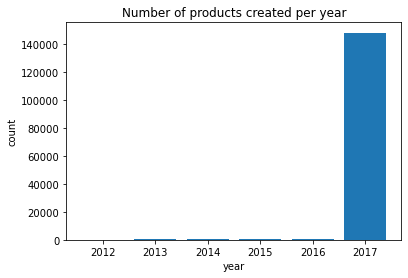

In [141]:
# create a figure and one plot
fig, ax = plt.subplots(nrows=1, ncols=1)
# place data in a bar chart
# where the x-axis is each year and
# the y-axis is the number of products added per year
ax.bar(product_year_count.keys(), product_year_count.values())

# set axis labels
ax.set_xlabel("year")
ax.set_ylabel("count")

# give the bar chart a title
ax.set_title("Number of products created per year")

-----

# Level Up: `Counter`

The `collections` package has a lot of useful tools for working with Python objects containing multiple elements. You can use the `Counter` class to easily count the number of values in a list.

For example, let's say that for all dictionaries in `sales`, we want to count how many property sales occured in each year. 

In [ ]:
from collections import Counter

prod_year_count = Counter([product['created_year'] for product in products])
prod_year_count

Let's sort these by year. Since the value in `sale_year` is an integer, we can use Python's built-in [`sorted`](https://docs.python.org/3/library/functions.html#sorted) function to transform the `Counter` object into a `list` of `tuples` - `(year, count)` which are sorted in ascending order by year.

In [ ]:
prod_year_count = sorted(prod_year_count.items())
prod_year_count

# Level Up: Using `datetime`

Python has a [`datetime`](https://docs.python.org/3.7/library/datetime.html) package that is the standard tool for handling dates and times. `datetime` objects make it easy to do fun things like subtract dates to calculate how far apart they are.

In [ ]:
from datetime import datetime

In [ ]:
for product in products:
    # Transform DocumentDate from string to datetime
    product["clean_date"] = datetime.strptime(product["last_modified_date"], 
                                           "%Y-%m-%d")
    
    # Add the sale year and month to each dictionary element of sales
    product["last_modified_year"] = product["clean_date"].year
    product["last_modified_month"] = product["clean_date"].month

Let's inspect our work

In [ ]:
products[0]